# Experiment 1

## sklearnDigits

Average Generation: 50000.0


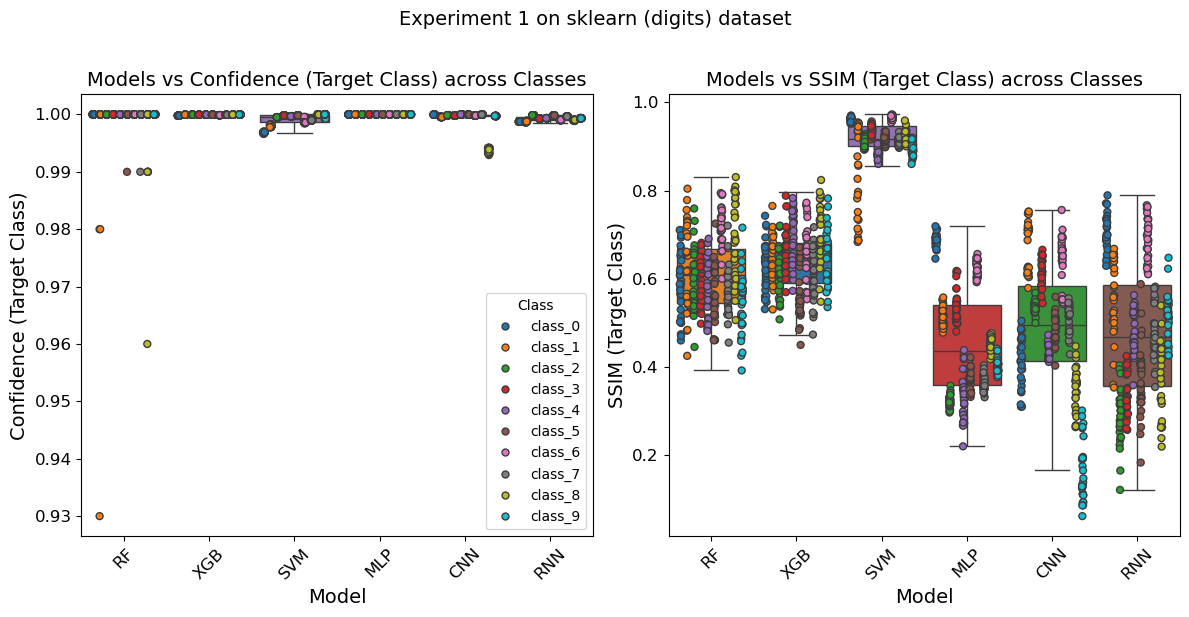

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_1_sklearnDigits_aggregated.csv")
experiment = "1"
dataset = "sklearn (digits)"

# Filter relevant columns (target class metrics)
target_metrics = ["Confidence (Target Class)", "SSIM (Target Class)"]
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

data = data[["Model", "Class", "Generation"] + target_metrics]
print("Average Generation:", data["Generation"].mean())

# Ensure classes are ordered from 0 to 9
data['Class'] = pd.Categorical(data['Class'], categories=[f'class_{i}' for i in range(10)], ordered=True)

# Define the order for the models on the x-axis
model_order = ["RF", "XGB", "SVM", "MLP", "CNN", "RNN"]

# Create strip plots for each metric with superimposed box plots
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x="Model", y=metric, data=data, hue="Model", 
                palette=custom_palette[:len(data["Model"].unique())], 
                showfliers=False, order=model_order, dodge=False)  # Add box plot
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", 
                  palette=custom_palette, jitter=True, dodge=True, linewidth=1, 
                  edgecolor='auto', order=model_order)  # Add strip plot
    plt.title(f"Models vs {metric} across Classes", fontsize=14)  # Adjust title fontsize
    plt.xlabel("Model", fontsize=14)  # Increase x-axis title fontsize
    plt.ylabel(metric, fontsize=14)  # Increase y-axis title fontsize
    plt.xticks(rotation=45)  # Rotate model names for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if i == 1:
        plt.legend(title='Class')  # Ensure legend for the first subplot
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

# Set the suptitle with proper alignment and spacing
plt.suptitle(f"Experiment {experiment} on {dataset} dataset", 
             fontsize=14, y=1.02, ha='center')  # Higher fontsize and adjusted 'y' position
plt.tight_layout()  # Adjust layout to ensure the plots fit below the suptitle

plt.show()


In [243]:
from scipy.stats import shapiro

for model in model_order:
    stat_conf, p_conf = shapiro(data[data["Model"] == model]["Confidence (Target Class)"])
    stat_ssim, p_ssim = shapiro(data[data["Model"] == model]["SSIM (Target Class)"])
    print(f"Shapiro-Wilk for {model} - Confidence: W={stat_conf}, p={p_conf}")
    print(f"Shapiro-Wilk for {model} - SSIM: W={stat_ssim}, p={p_ssim}")


Shapiro-Wilk for RF - Confidence: W=0.12173723710583961, p=5.756061698984033e-35
Shapiro-Wilk for RF - SSIM: W=0.9900773503310321, p=0.039443539654867285
Shapiro-Wilk for XGB - Confidence: W=0.6651367154098915, p=6.400711288842863e-24
Shapiro-Wilk for XGB - SSIM: W=0.9939521272883726, p=0.2759286241002257
Shapiro-Wilk for SVM - Confidence: W=0.8042358792188427, p=1.001074227748701e-18
Shapiro-Wilk for SVM - SSIM: W=0.7689667177122592, p=2.953768937275288e-20
Shapiro-Wilk for MLP - Confidence: W=0.4922469870300218, p=2.033362947027525e-28
Shapiro-Wilk for MLP - SSIM: W=0.9352342597886065, p=3.6213375097871025e-10
Shapiro-Wilk for CNN - Confidence: W=0.4115611654789624, p=4.130378500743126e-30
Shapiro-Wilk for CNN - SSIM: W=0.9574762961340697, p=1.1510141337520657e-07
Shapiro-Wilk for RNN - Confidence: W=0.9293892929716532, p=9.859316741981602e-11
Shapiro-Wilk for RNN - SSIM: W=0.9736443804650502, p=2.5585920944350538e-05


In [244]:
from scipy.stats import kruskal

# Confidence Metric
confidence_groups = [data[data["Model"] == model]["Confidence (Target Class)"] for model in model_order]
kruskal_conf = kruskal(*confidence_groups)

# SSIM Metric
ssim_groups = [data[data["Model"] == model]["SSIM (Target Class)"] for model in model_order]
kruskal_ssim = kruskal(*ssim_groups)

print(f"Kruskal-Wallis Test for Confidence: H={kruskal_conf.statistic}, p={kruskal_conf.pvalue}")
print(f"Kruskal-Wallis Test for SSIM: H={kruskal_ssim.statistic}, p={kruskal_ssim.pvalue}")


Kruskal-Wallis Test for Confidence: H=1326.8669849767484, p=9.650205141921048e-285
Kruskal-Wallis Test for SSIM: H=1045.0770191868705, p=1.0451919211197057e-223


In [245]:
from scipy.stats import mannwhitneyu
from itertools import combinations
from statsmodels.stats.multitest import multipletests

# Pairwise comparisons for Confidence
pairs = list(combinations(model_order, 2))
p_values_conf = []
for model1, model2 in pairs:
    group1 = data[data["Model"] == model1]["Confidence (Target Class)"]
    group2 = data[data["Model"] == model2]["Confidence (Target Class)"]
    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")
    p_values_conf.append(p)

# Adjust p-values for multiple comparisons
adjusted_p_conf = multipletests(p_values_conf, method="bonferroni")[1]

# Pairwise comparisons for SSIM
p_values_ssim = []
for model1, model2 in pairs:
    group1 = data[data["Model"] == model1]["SSIM (Target Class)"]
    group2 = data[data["Model"] == model2]["SSIM (Target Class)"]
    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")
    p_values_ssim.append(p)

adjusted_p_ssim = multipletests(p_values_ssim, method="bonferroni")[1]

print("Adjusted p-values for Confidence (Pairwise Mann-Whitney):", adjusted_p_conf)
print("Adjusted p-values for SSIM (Pairwise Mann-Whitney):", adjusted_p_ssim)


Adjusted p-values for Confidence (Pairwise Mann-Whitney): [9.04275857e-97 9.12766700e-97 1.94265698e-81 9.06388064e-97
 9.12659289e-97 1.74103604e-34 1.50714453e-98 6.51955836e-03
 7.27236023e-91 1.51992671e-98 8.40679942e-11 1.00000000e+00
 1.51032533e-98 1.51976509e-98 8.54868728e-38]
Adjusted p-values for SSIM (Pairwise Mann-Whitney): [2.46144764e-05 1.11172890e-96 1.57099369e-41 3.91159269e-28
 9.87976647e-27 1.60394536e-96 8.43270823e-55 8.65772618e-45
 3.59666879e-38 2.97091862e-98 5.97586513e-98 1.61871127e-97
 1.14950609e-02 1.00000000e+00 1.00000000e+00]


### strip + violin plot

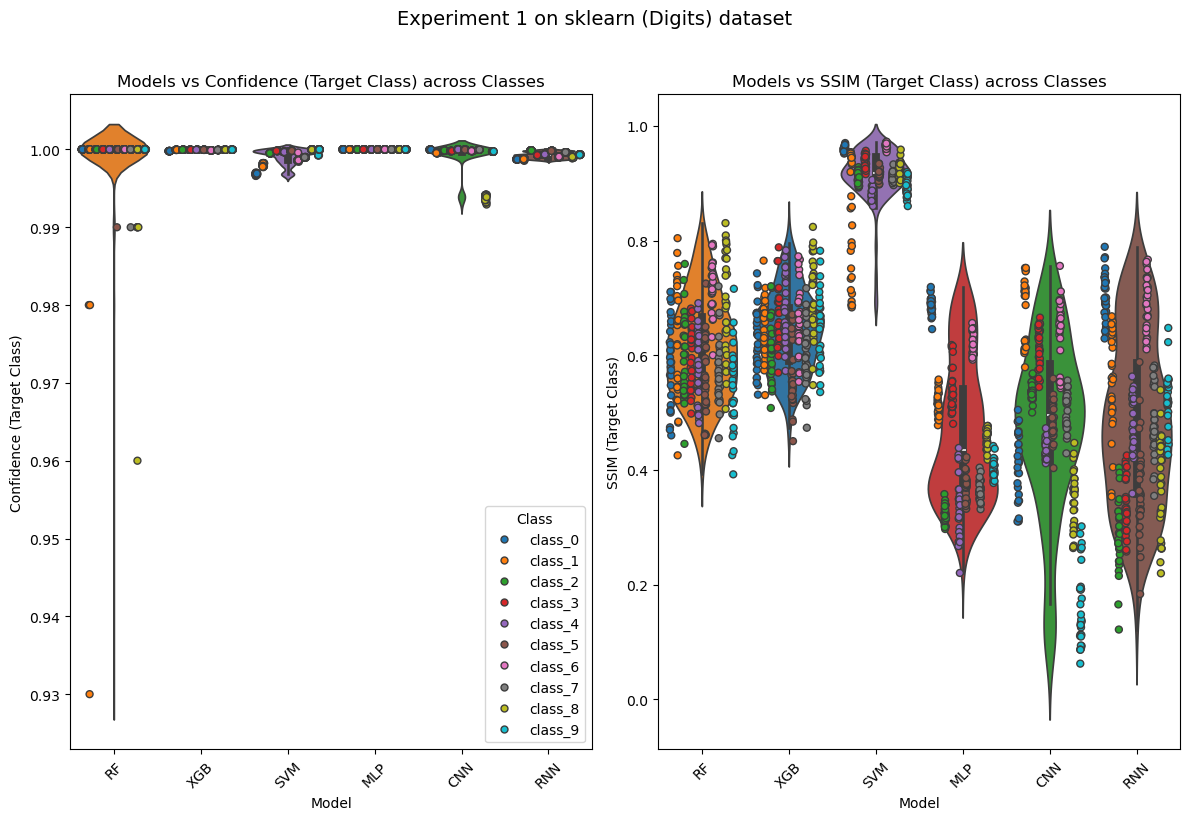

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_1_sklearnDigits_aggregated.csv")
experiment = "1"
dataset = "sklearn (Digits)"

# Filter relevant columns (target class metrics)
target_metrics = ["Confidence (Target Class)", "SSIM (Target Class)"]
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

data = data[["Model", "Class", "Generation"] + target_metrics]

# Ensure classes are ordered from 0 to 9
data['Class'] = pd.Categorical(data['Class'], categories=[f'class_{i}' for i in range(10)], ordered=True)

# Define the order for the models on the x-axis
model_order = ["RF", "XGB", "SVM", "MLP", "CNN", "RNN"]

# Create strip plots for each metric with superimposed violin plots
plt.figure(figsize=(12, 8))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 2, i)
    sns.violinplot(x="Model", y=metric, data=data, hue="Model", 
                   palette=custom_palette[:len(data["Model"].unique())], 
                   order=model_order, dodge=False)  # Add violin plot
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", 
                  palette=custom_palette, jitter=True, dodge=True, linewidth=1, 
                  edgecolor='auto', order=model_order)  # Add strip plot
    plt.title(f"Models vs {metric} across Classes")
    plt.xticks(rotation=45)  # Rotate model names for better readability
    if i == 1:
        plt.legend(title='Class')  # Ensure legend for the first subplot
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

# Set the suptitle with proper alignment and spacing
plt.suptitle(f"Experiment {experiment} on {dataset} dataset", 
             fontsize=14, y=1.02, ha='center')  # Higher fontsize and adjusted 'y' position
plt.tight_layout()  # Adjust layout to ensure the plots fit below the suptitle

plt.show()


## mnistDigits

Average Generation: 100000.0


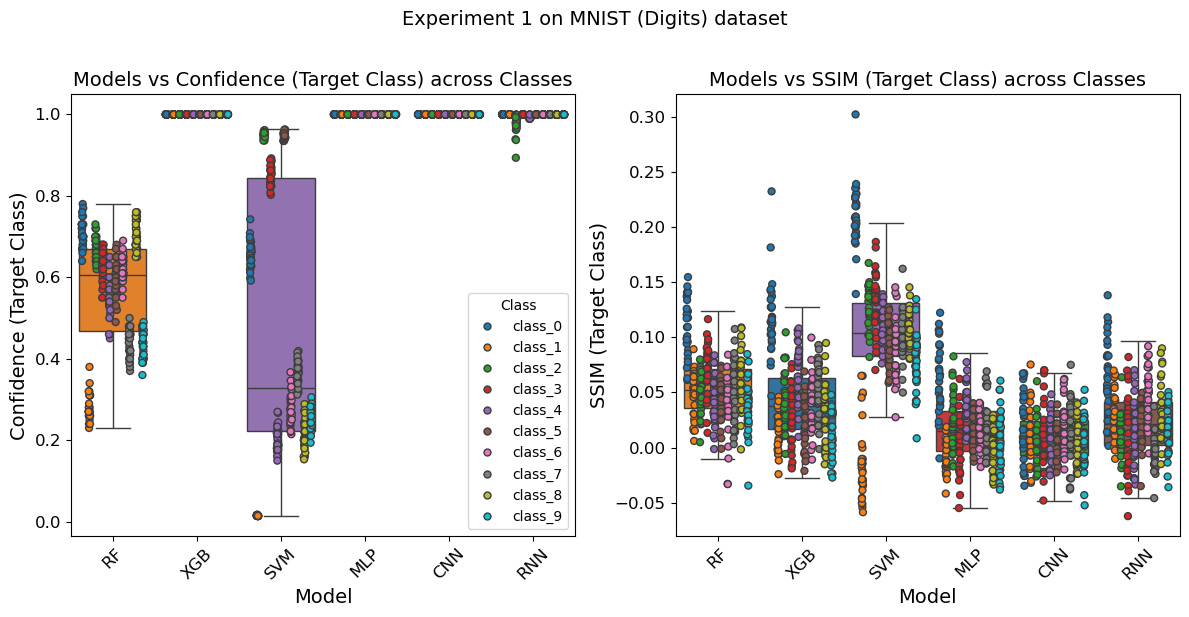

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_1_mnistDigits_aggregated.csv")
experiment = "1"
dataset = "MNIST (Digits)"

# Filter relevant columns (target class metrics)
target_metrics = ["Confidence (Target Class)", "SSIM (Target Class)"]
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

data = data[["Model", "Class", "Generation"] + target_metrics]
print("Average Generation:", data["Generation"].mean())


# Ensure classes are ordered from 0 to 9
data['Class'] = pd.Categorical(data['Class'], categories=[f'class_{i}' for i in range(10)], ordered=True)

# Define the order for the models on the x-axis
model_order = ["RF", "XGB", "SVM", "MLP", "CNN", "RNN"]

# Create strip plots for each metric with superimposed box plots
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x="Model", y=metric, data=data, hue="Model", 
                palette=custom_palette[:len(data["Model"].unique())], 
                showfliers=False, order=model_order, dodge=False)  # Add box plot
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", 
                  palette=custom_palette, jitter=True, dodge=True, linewidth=1, 
                  edgecolor='auto', order=model_order)  # Add strip plot
    plt.title(f"Models vs {metric} across Classes", fontsize=14)  # Adjust title fontsize
    plt.xlabel("Model", fontsize=14)  # Increase x-axis title fontsize
    plt.ylabel(metric, fontsize=14)  # Increase y-axis title fontsize
    plt.xticks(rotation=45)  # Rotate model names for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if i == 1:
        plt.legend(title='Class')  # Ensure legend for the first subplot
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

# Set the suptitle with proper alignment and spacing
plt.suptitle(f"Experiment {experiment} on {dataset} dataset", 
             fontsize=14, y=1.02, ha='center')  # Higher fontsize and adjusted 'y' position
plt.tight_layout()  # Adjust layout to ensure the plots fit below the suptitle

plt.show()



## mnistFashion

Average Generation: 99327.67833333333
Average Generation is not 100000. Details:
Number of instances: 22
      Generation Model    Class     Replicate
239      90313.0   CNN  class_7  replicate_30
900      58306.0   RNN  class_8  replicate_27
907      56887.0   RNN  class_8  replicate_23
915      58976.0   RNN  class_8  replicate_24
918      57842.0   RNN  class_8  replicate_26
926      58730.0   RNN  class_8  replicate_25
929      57653.0   RNN  class_8  replicate_30
930      46360.0   RNN  class_7  replicate_27
931      45972.0   RNN  class_7  replicate_29
945      46065.0   RNN  class_7  replicate_24
948      46298.0   RNN  class_7  replicate_26
956      46436.0   RNN  class_7  replicate_25
961      27416.0   RNN  class_4  replicate_29
984      27279.0   RNN  class_4  replicate_28
989      27443.0   RNN  class_4  replicate_30
1110     53493.0   RNN  class_5  replicate_27
1112     29956.0   RNN  class_5  replicate_22
1113     29952.0   RNN  class_5  replicate_21
1117     29832.0   RN

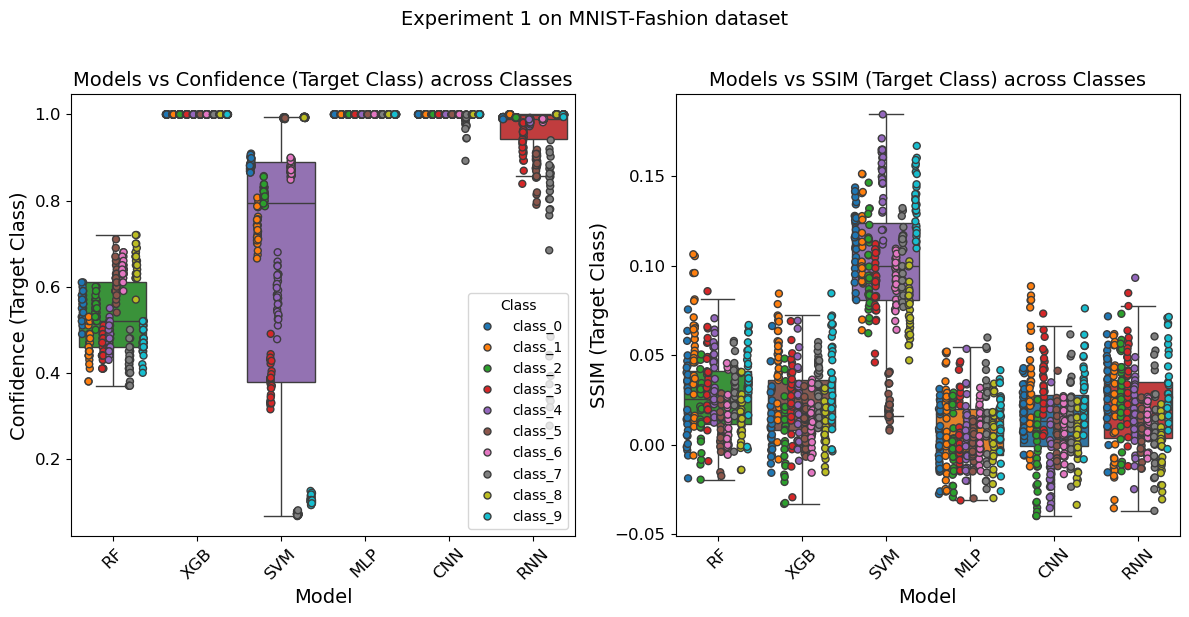

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_1_mnistFashion_aggregated.csv")
experiment = "1"
dataset = "MNIST-Fashion"

# Filter relevant columns (target class metrics)
target_metrics = ["Confidence (Target Class)", "SSIM (Target Class)"]
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

data = data[["Model", "Class", "Generation" , "Replicate"] + target_metrics]
print("Average Generation:", data["Generation"].mean())
# Check if the average generation is not 100000 and print the relevant info
if not np.isclose(data["Generation"].mean(), 100000):
    print("Average Generation is not 100000. Details:")
    print(f"Number of instances: {len(data[~np.isclose(data['Generation'], 100000)])}")
    print(data[["Generation", "Model", "Class", "Replicate"]][~np.isclose(data["Generation"], 100000)])


# Ensure classes are ordered from 0 to 9
data['Class'] = pd.Categorical(data['Class'], categories=[f'class_{i}' for i in range(10)], ordered=True)

# Define the order for the models on the x-axis
model_order = ["RF", "XGB", "SVM", "MLP", "CNN", "RNN"]

# Create strip plots for each metric with superimposed box plots
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x="Model", y=metric, data=data, hue="Model", 
                palette=custom_palette[:len(data["Model"].unique())], 
                showfliers=False, order=model_order, dodge=False)  # Add box plot
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", 
                  palette=custom_palette, jitter=True, dodge=True, linewidth=1, 
                  edgecolor='auto', order=model_order)  # Add strip plot
    plt.title(f"Models vs {metric} across Classes", fontsize=14)  # Adjust title fontsize
    plt.xlabel("Model", fontsize=14)  # Increase x-axis title fontsize
    plt.ylabel(metric, fontsize=14)  # Increase y-axis title fontsize
    plt.xticks(rotation=45)  # Rotate model names for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if i == 1:
        plt.legend(title='Class')  # Ensure legend for the first subplot
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

# Set the suptitle with proper alignment and spacing
plt.suptitle(f"Experiment {experiment} on {dataset} dataset", 
             fontsize=14, y=1.02, ha='center')  # Higher fontsize and adjusted 'y' position
plt.tight_layout()  # Adjust layout to ensure the plots fit below the suptitle

plt.show()


# Experiment 2_2

## sklearnDigits

Average Generation: 50000.0


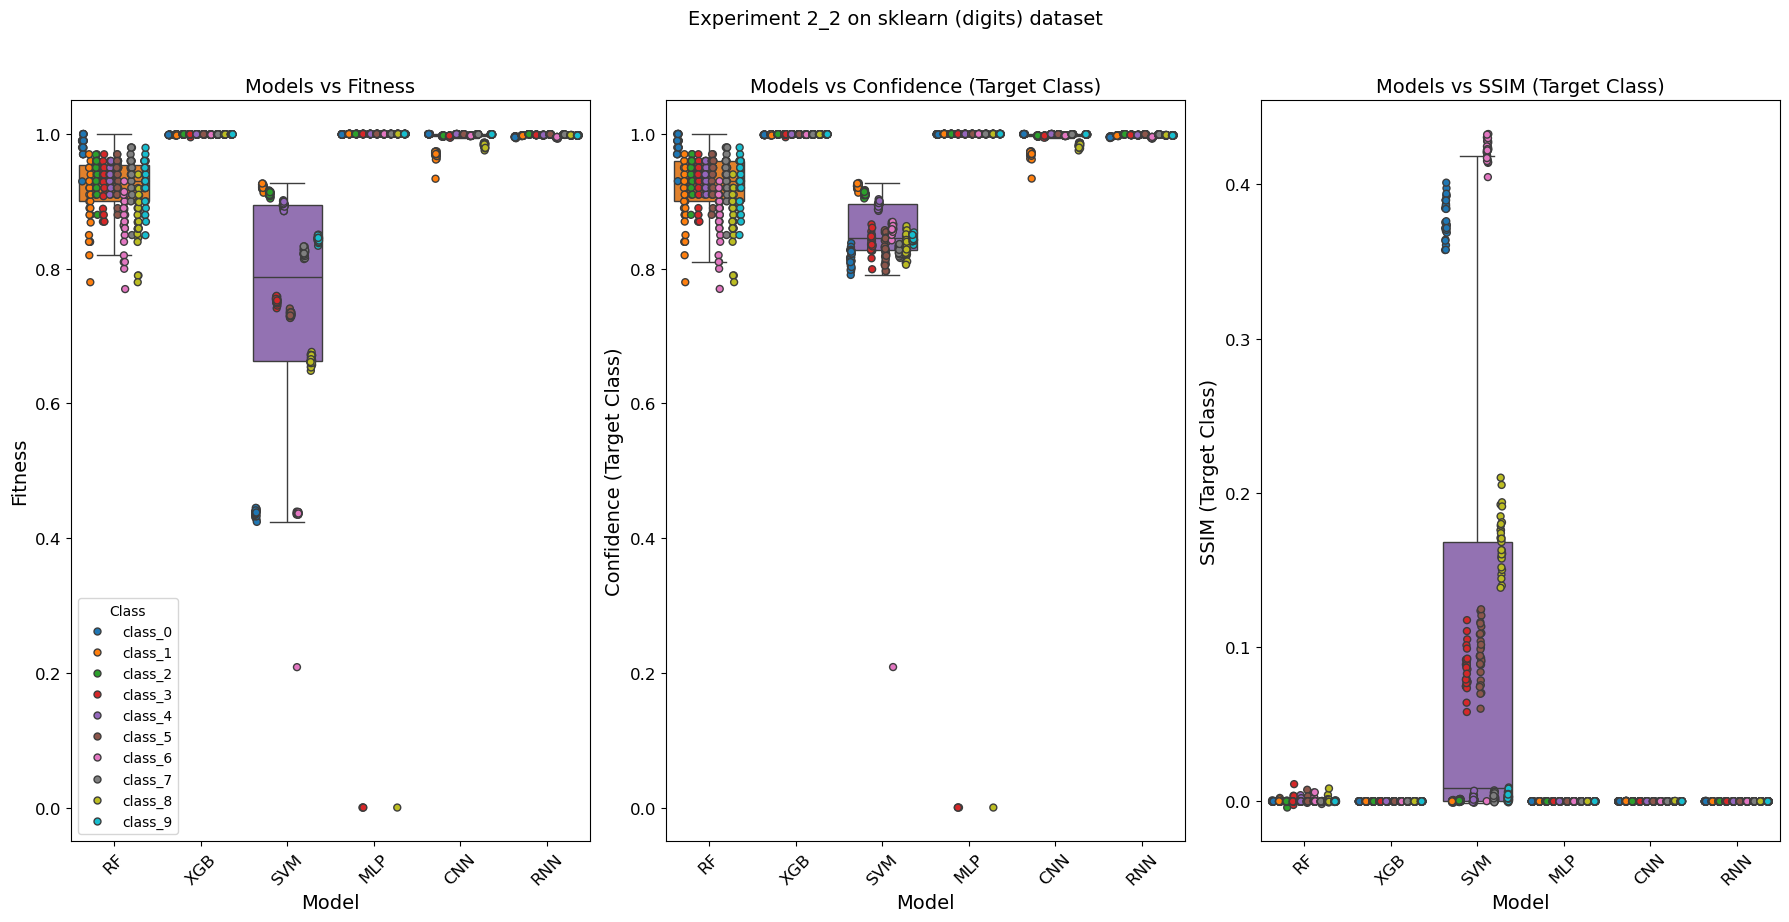

In [286]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_2_2_sklearnDigits_aggregated.csv")
experiment = "2_2"
dataset = "sklearn (digits)"

# Filter relevant columns (target class metrics)
target_metrics = ["Fitness", "Confidence (Target Class)", "SSIM (Target Class)"]
num_metrics = len(target_metrics)

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

data = data[["Model", "Class", "Generation" , "Replicate"] + target_metrics]
print("Average Generation:", data["Generation"].mean())
# Check if the average generation is not 50000 and print the relevant info
if not np.isclose(data["Generation"].mean(), 50000):
    print("Average Generation is not 50000. Details:")
    print(f"Number of instances: {len(data[~np.isclose(data['Generation'], 50000)])}")
    print(data[["Generation", "Model", "Class", "Replicate"]][~np.isclose(data["Generation"], 50000)])


# Ensure classes are ordered from 0 to 9
data['Class'] = pd.Categorical(data['Class'], categories=[f'class_{i}' for i in range(10)], ordered=True)

# Define the order for the models on the x-axis
model_order = ["RF", "XGB", "SVM", "MLP", "CNN", "RNN"]

# Create strip plots for each metric with superimposed box plots
plt.figure(figsize=(6 * num_metrics, 3 * num_metrics))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Model", y=metric, data=data, hue="Model", 
                palette=custom_palette[:len(data["Model"].unique())], 
                showfliers=False, order=model_order, dodge=False)  # Add box plot
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", 
                  palette=custom_palette, jitter=True, dodge=True, linewidth=1, 
                  edgecolor='auto', order=model_order)  # Add strip plot
    plt.title(f"Models vs {metric}", fontsize=14)  # Adjust title fontsize
    plt.xlabel("Model", fontsize=14)  # Increase x-axis title fontsize
    plt.ylabel(metric, fontsize=14)  # Increase y-axis title fontsize
    plt.xticks(rotation=45)  # Rotate model names for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if i == 1:
        plt.legend(title='Class')  # Ensure legend for the first subplot
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

# Set the suptitle with proper alignment and spacing
plt.suptitle(f"Experiment {experiment} on {dataset} dataset", 
             fontsize=14, y=1.02, ha='center')  # Higher fontsize and adjusted 'y' position
plt.tight_layout()  # Adjust layout to ensure the plots fit below the suptitle

plt.show()



In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_2_2_sklearnDigits_aggregated.csv")

# Filter relevant columns (target class metrics)
target_metrics = ["Confidence (Target Class)", "SSIM (Target Class)", "Fitness"]

data = data[["Model", "Class"] + target_metrics]


In [119]:
data

Model    Class  Confidence (Target Class)  SSIM (Target Class)   Fitness
0      XGB  class_8                   0.999443        -1.455024e-04  0.999297
1      XGB  class_8                   0.999599         3.077813e-06  0.999596
2      XGB  class_8                   0.999530        -2.736750e-06  0.999527
3      XGB  class_8                   0.999519        -3.954881e-06  0.999515
4      XGB  class_8                   0.999196        -1.260067e-05  0.999183
...    ...      ...                        ...                  ...       ...
1795   RNN  class_2                   0.999761         1.062183e-05  0.999750
1796   RNN  class_2                   0.999706        -1.648711e-05  0.999689
1797   RNN  class_2                   0.999705         9.520478e-07  0.999704
1798   RNN  class_2                   0.999696         2.198965e-05  0.999674
1799   RNN  class_2                   0.999661        -1.437572e-06  0.999659

[1800 rows x 5 columns]

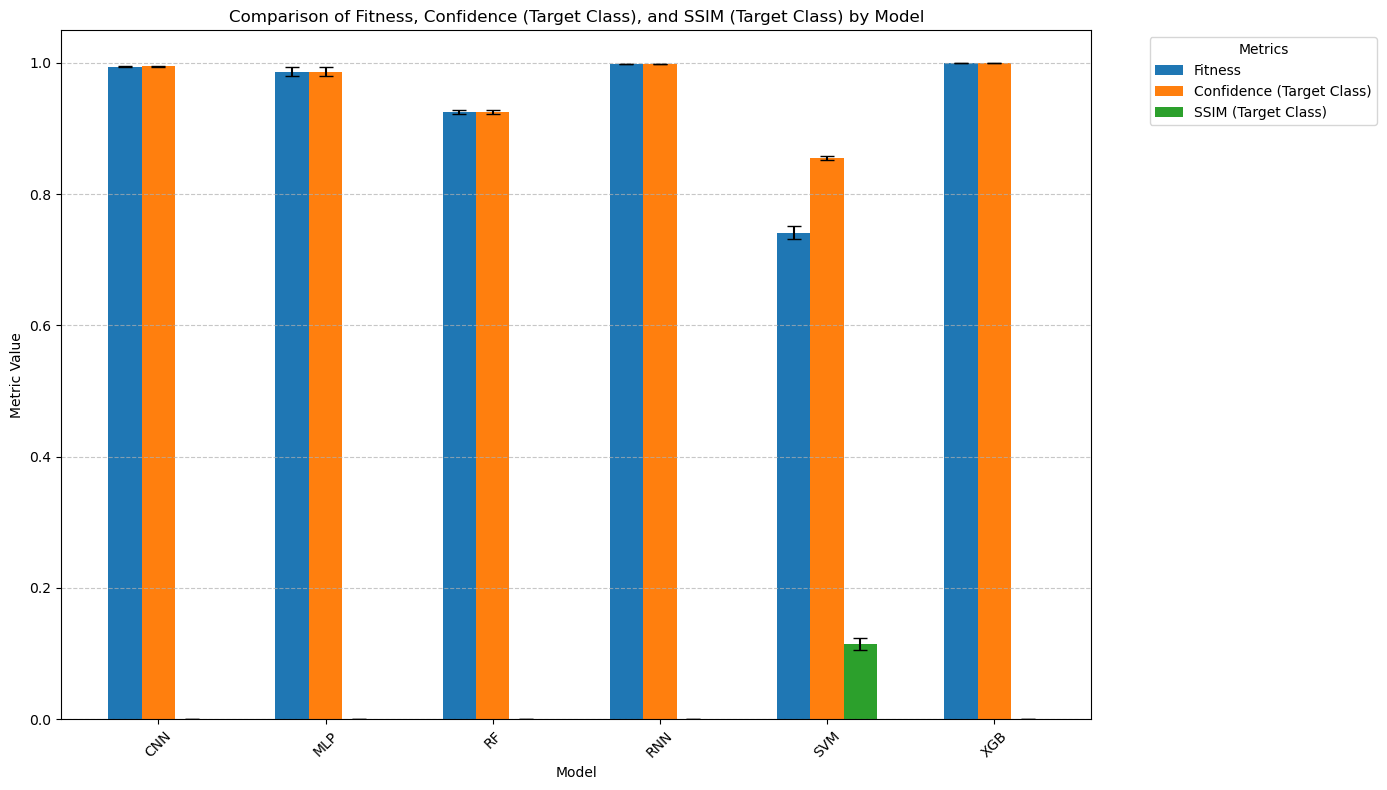

In [114]:
# Calculate mean and standard deviation for each metric by model
summary_stats = data.groupby("Model")[target_metrics].agg(["mean", "sem"]).reset_index()

# Set up the plot
plt.figure(figsize=(14, 8))
bar_width = 0.2  # Width of each bar
x = np.arange(len(summary_stats["Model"]))  # X-axis positions for models

# Plot bars for each metric
for i, metric in enumerate(target_metrics):
    plt.bar(
        x + i * bar_width,  # Offset bars for each metric
        summary_stats[(metric, "mean")],  # Mean values
        width=bar_width,
        yerr=summary_stats[(metric, "sem")],  # Error bars (standard deviation)
        capsize=5,  # Add caps to error bars
        label=metric  # Label for the legend
    )

# Customize the plot
plt.xlabel("Model")
plt.ylabel("Metric Value")
plt.title("Comparison of Fitness, Confidence (Target Class), and SSIM (Target Class) by Model")
plt.xticks(x + bar_width, summary_stats["Model"], rotation=45)  # X-axis labels
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc="upper left")  # Add legend
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

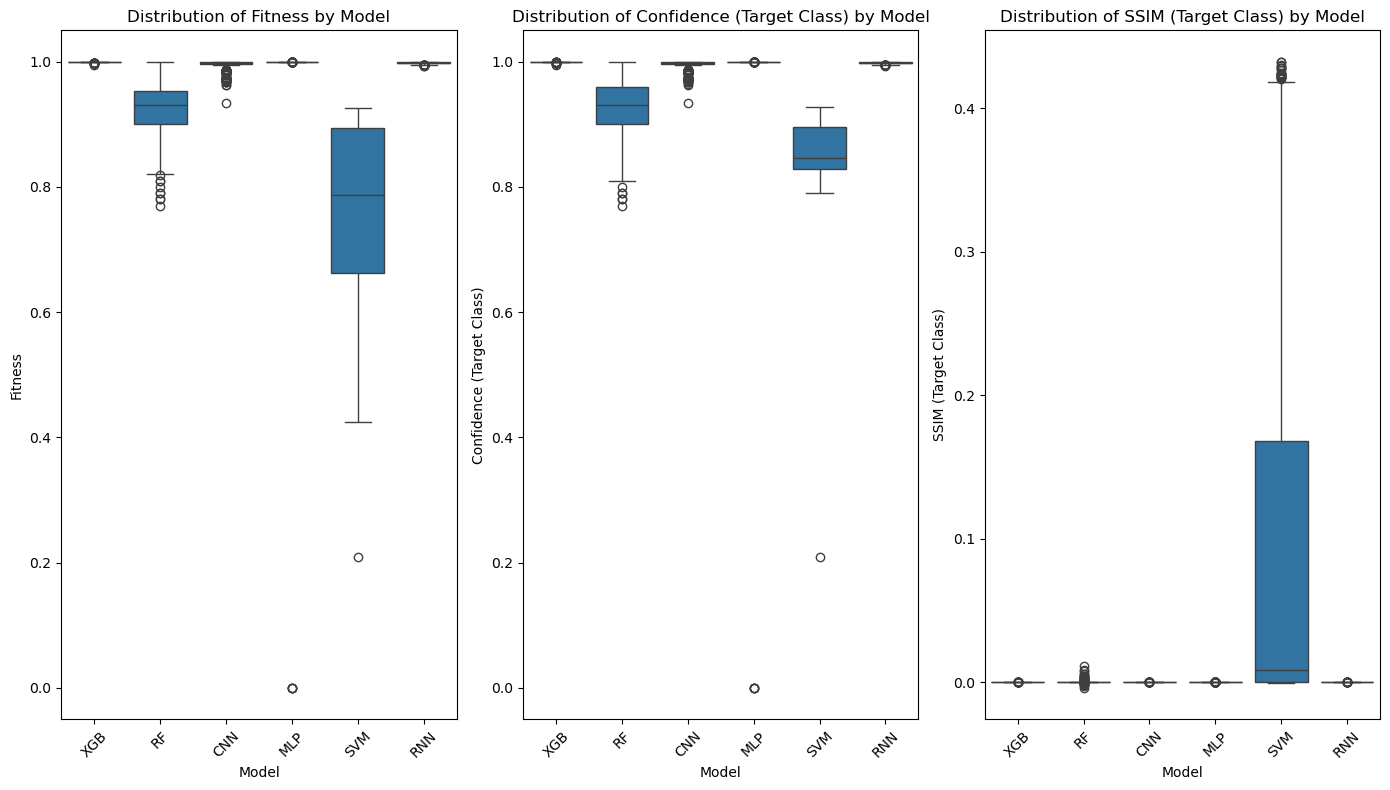

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter relevant columns (target class metrics)
target_metrics = ["Fitness", "Confidence (Target Class)", "SSIM (Target Class)"]
data = data[["Model"] + target_metrics]

# Create box plots for each metric
plt.figure(figsize=(14, 8))
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Model", y=metric, data=data)
    plt.title(f"Distribution of {metric} by Model")
    plt.xticks(rotation=45)  # Rotate model names for better readability
plt.tight_layout()
plt.show()

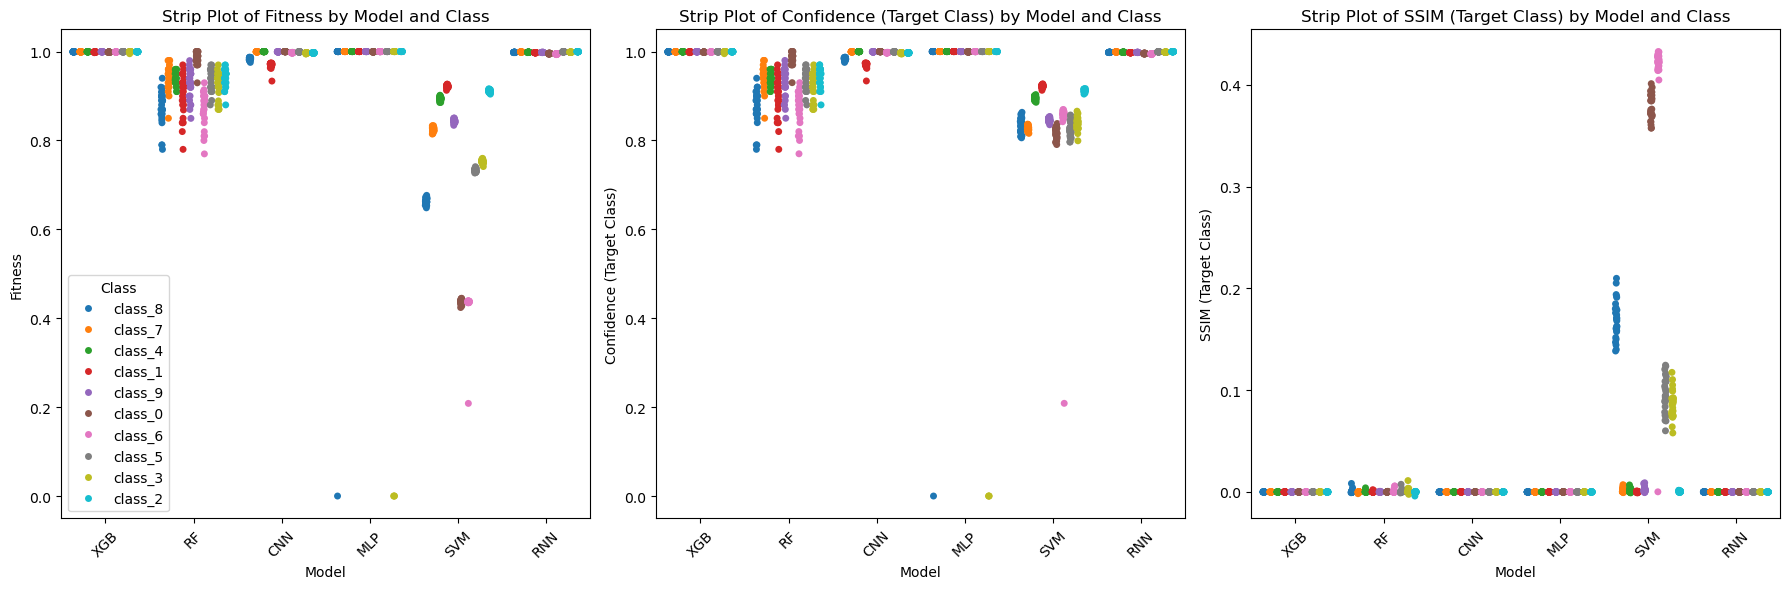

In [120]:
# Define the target metrics (replace with your actual metrics)
target_metrics = ['Fitness', 'Confidence (Target Class)', 'SSIM (Target Class)']
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Create strip plots for each metric
plt.figure(figsize=(18, 6))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 3, i)
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", palette=custom_palette, jitter=True, dodge=True)
    plt.title(f"Strip Plot of {metric} by Model and Class")
    plt.xticks(rotation=45)  # Rotate model names for better readability
    if i == 1:
        plt.legend(title='Class')
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

plt.tight_layout()
plt.show()

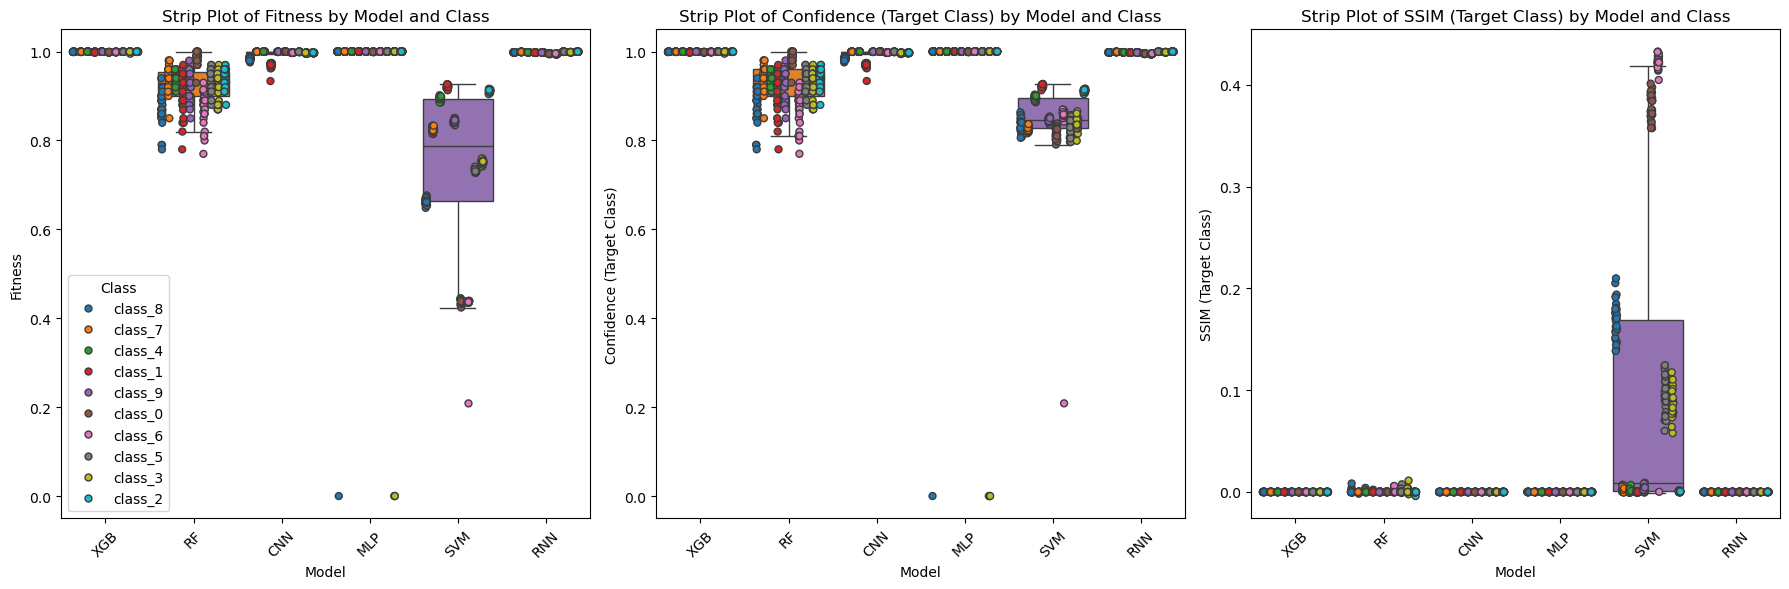

In [112]:
# Create strip plots for each metric with superimposed box plots
plt.figure(figsize=(18, 6))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Model", y=metric, data=data, hue="Model", palette=custom_palette[:len(data["Model"].unique())], showfliers=False, legend=False)  # Add box plot
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", palette=custom_palette, jitter=True, dodge=True, linewidth=1, edgecolor='auto')  # Add strip plot
    plt.title(f"Strip Plot of {metric} by Model and Class")
    plt.xticks(rotation=45)  # Rotate model names for better readability
    if i == 1:
        plt.legend(title='Class')
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

plt.tight_layout()
plt.show()


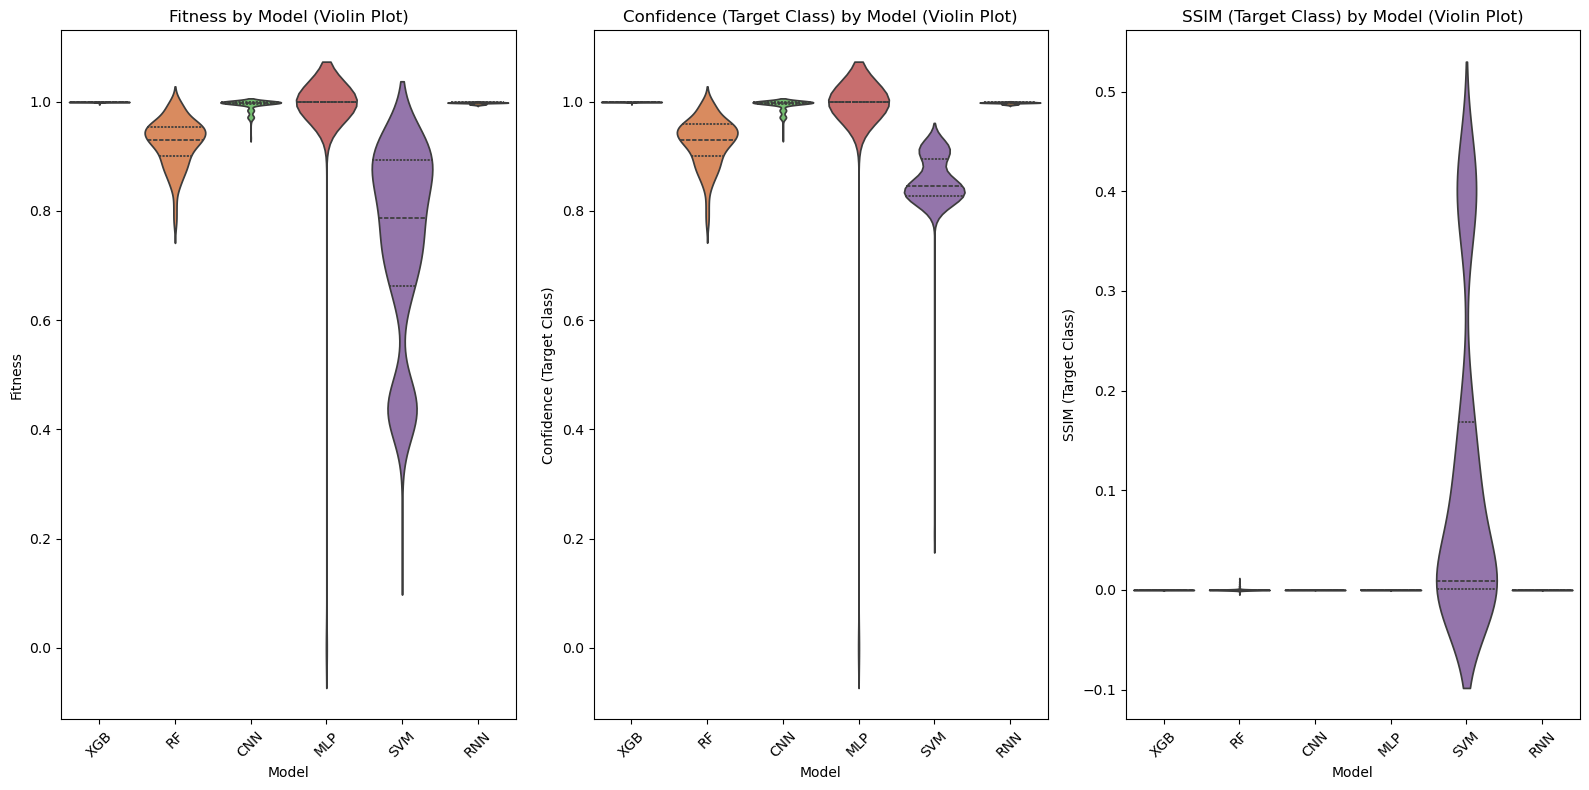

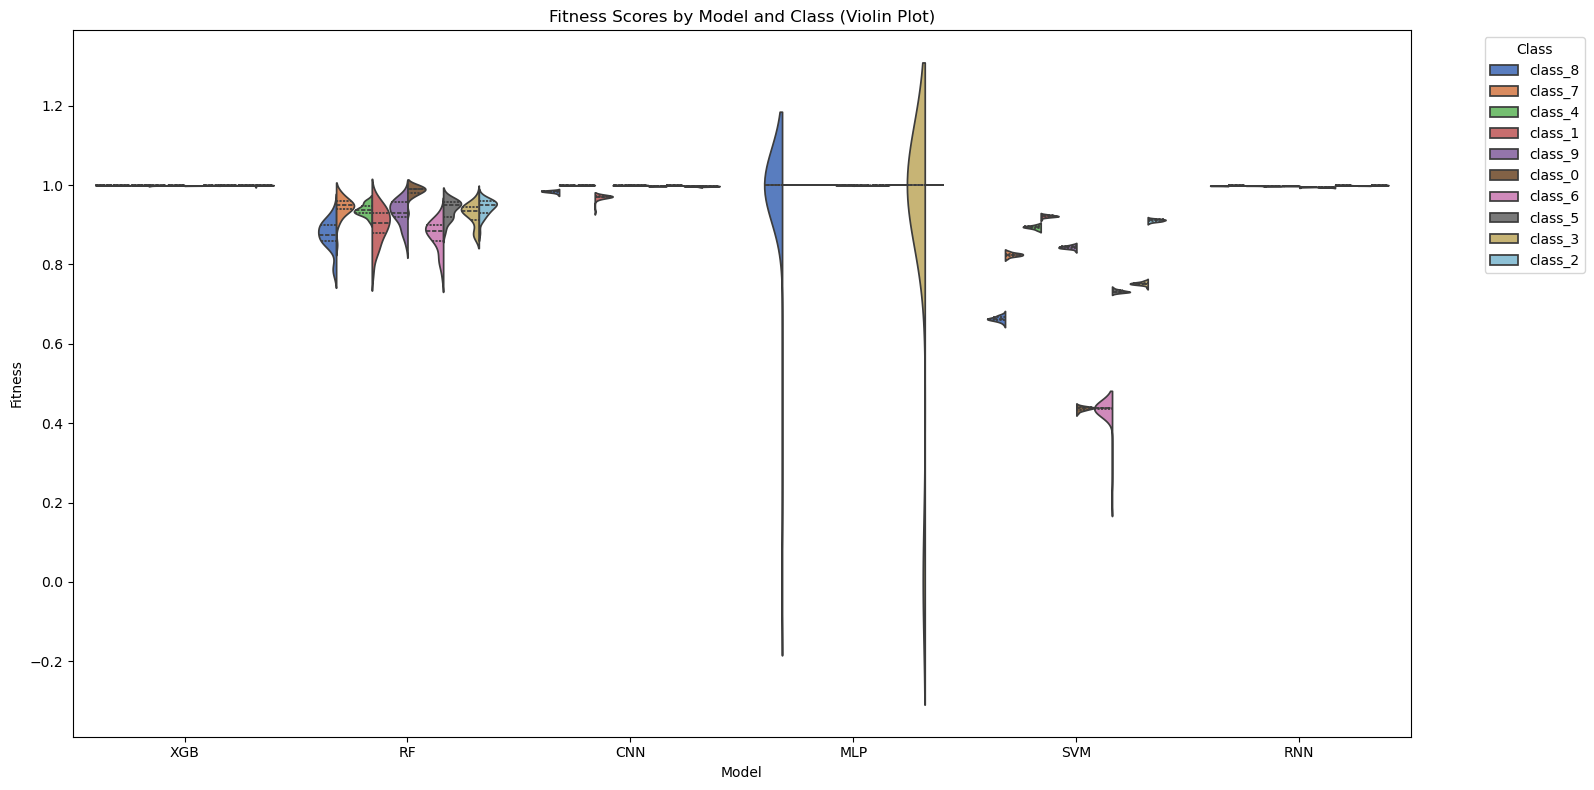

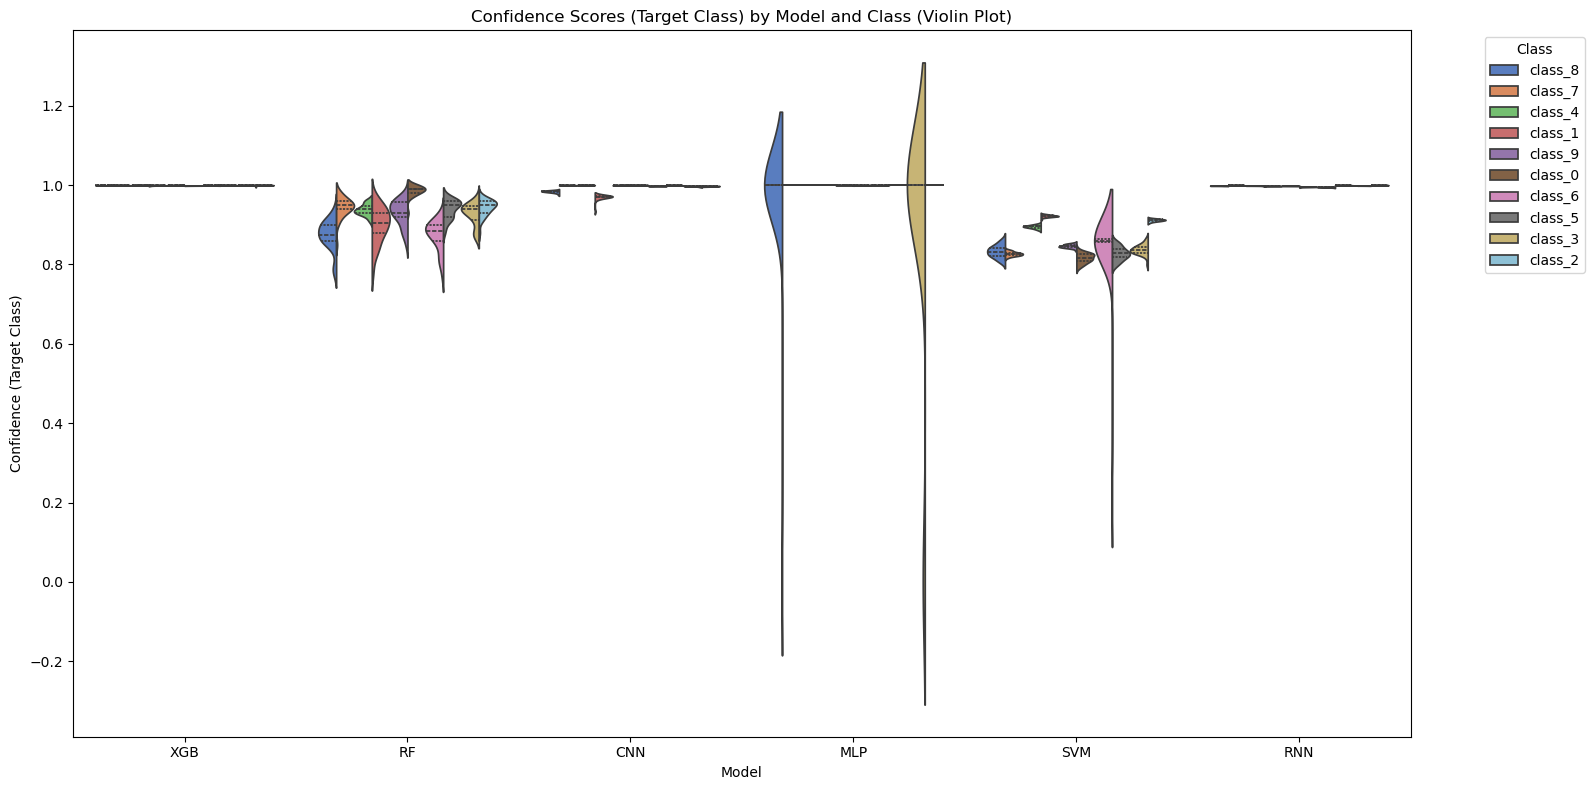

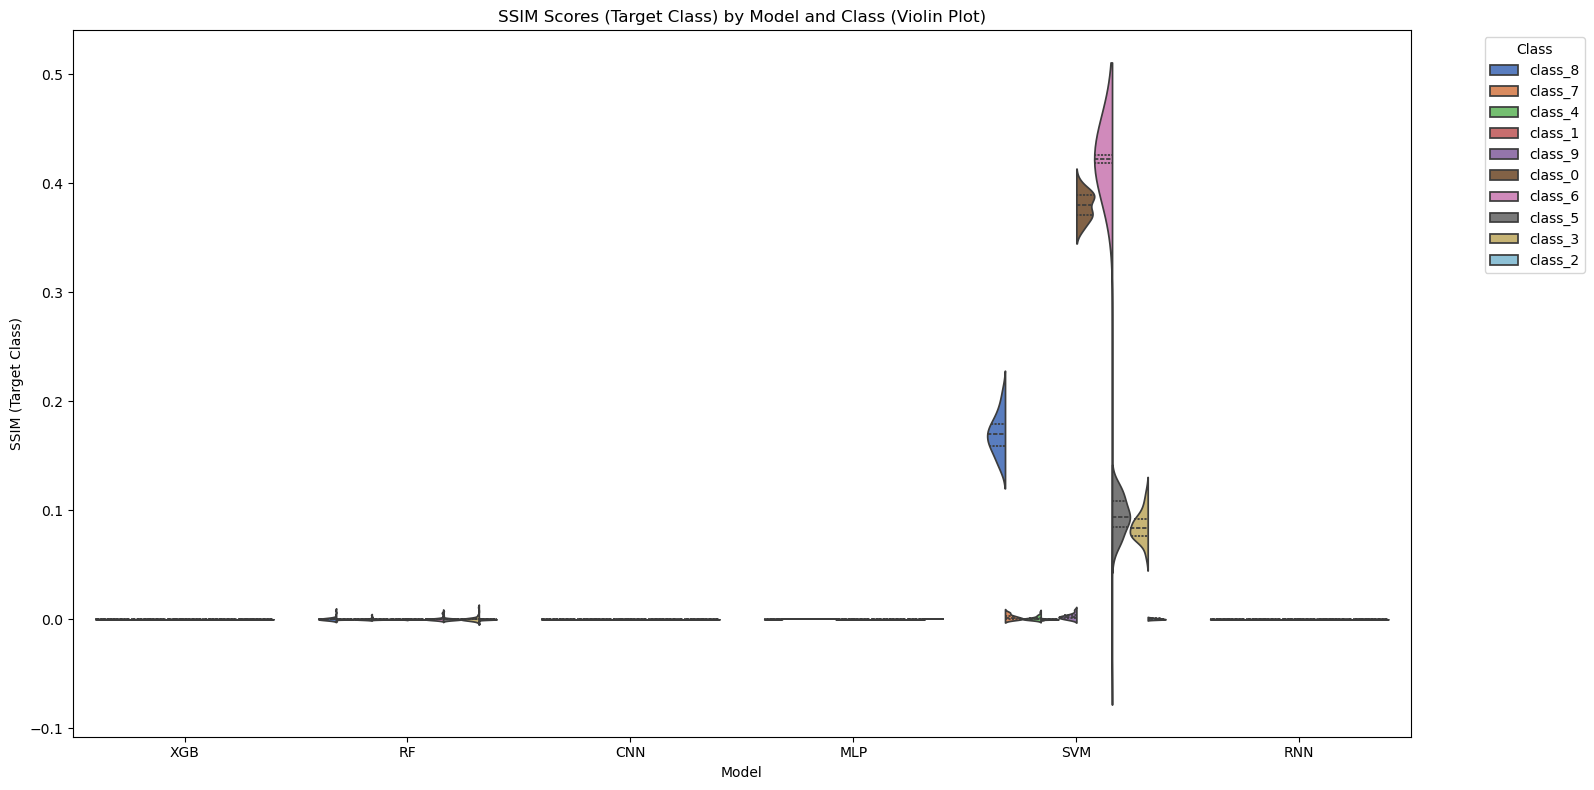

In [115]:
# Violin plot for combined metrics by model
plt.figure(figsize=(16, 8))
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(data=data, x='Model', y=metric, inner='quartile', hue='Model', palette='muted', legend=False)
    plt.title(f'{metric} by Model (Violin Plot)')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Violin plot for fitness scores by model and class
plt.figure(figsize=(16, 8))
sns.violinplot(data=data, x='Model', y='Fitness', hue='Class', split=True, inner='quartile', density_norm='width', palette='muted')
plt.title('Fitness Scores by Model and Class (Violin Plot)')
plt.ylabel('Fitness')
plt.xlabel('Model')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Violin plot for confidence scores by model and class
plt.figure(figsize=(16, 8))
sns.violinplot(data=data, x='Model', y='Confidence (Target Class)', hue='Class', split=True, inner='quartile', density_norm='width', palette='muted')
plt.title('Confidence Scores (Target Class) by Model and Class (Violin Plot)')
plt.ylabel('Confidence (Target Class)')
plt.xlabel('Model')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Violin plot for SSIM scores by model and class
plt.figure(figsize=(16, 8))
sns.violinplot(data=data, x='Model', y='SSIM (Target Class)', hue='Class', split=True, inner='quartile', density_norm='width', palette='muted')
plt.title('SSIM Scores (Target Class) by Model and Class (Violin Plot)')
plt.ylabel('SSIM (Target Class)')
plt.xlabel('Model')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## mnistDigits

Average Generation: 100000.0


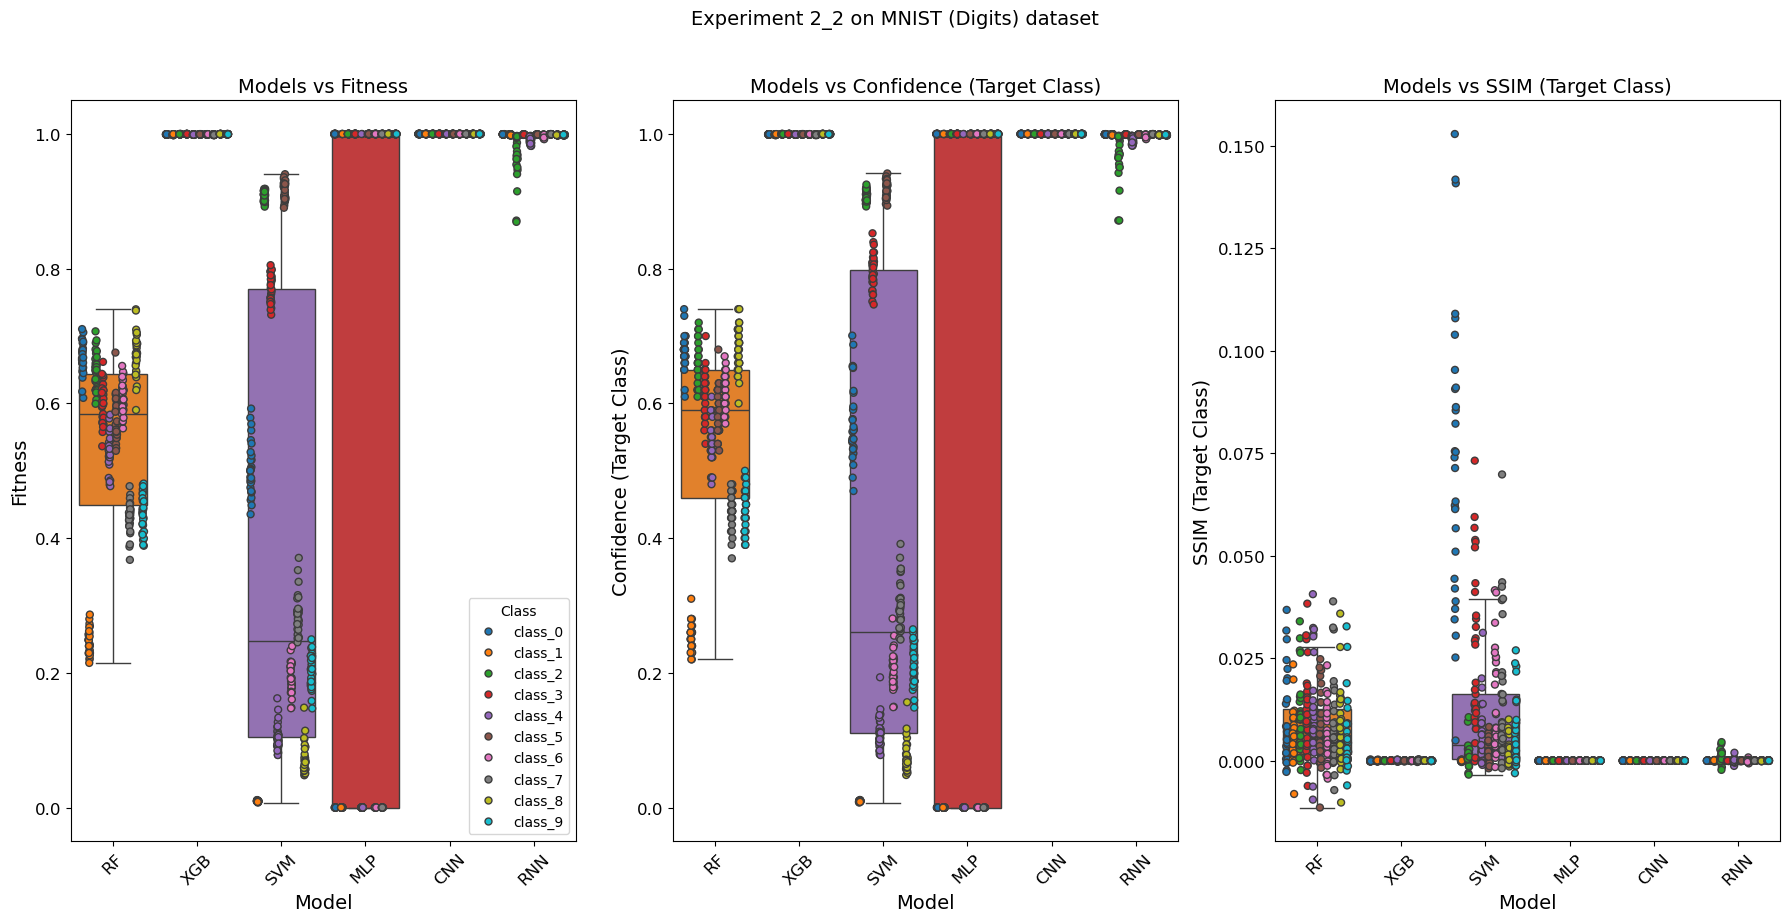

In [282]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_2_2_mnistDigits_aggregated.csv")
experiment = "2_2"
dataset = "MNIST (Digits)"

# Filter relevant columns (target class metrics)
target_metrics = ["Fitness", "Confidence (Target Class)", "SSIM (Target Class)"]
num_metrics = len(target_metrics)

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

data = data[["Model", "Class", "Generation" , "Replicate"] + target_metrics]
print("Average Generation:", data["Generation"].mean())
# Check if the average generation is not 100000 and print the relevant info
if not np.isclose(data["Generation"].mean(), 100000):
    print("Average Generation is not 100000. Details:")
    print(f"Number of instances: {len(data[~np.isclose(data['Generation'], 100000)])}")
    print(data[["Generation", "Model", "Class", "Replicate"]][~np.isclose(data["Generation"], 100000)])


# Ensure classes are ordered from 0 to 9
data['Class'] = pd.Categorical(data['Class'], categories=[f'class_{i}' for i in range(10)], ordered=True)

# Define the order for the models on the x-axis
model_order = ["RF", "XGB", "SVM", "MLP", "CNN", "RNN"]

# Create strip plots for each metric with superimposed box plots
plt.figure(figsize=(6 * num_metrics, 3 * num_metrics))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Model", y=metric, data=data, hue="Model", 
                palette=custom_palette[:len(data["Model"].unique())], 
                showfliers=False, order=model_order, dodge=False)  # Add box plot
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", 
                  palette=custom_palette, jitter=True, dodge=True, linewidth=1, 
                  edgecolor='auto', order=model_order)  # Add strip plot
    plt.title(f"Models vs {metric}", fontsize=14)  # Adjust title fontsize
    plt.xlabel("Model", fontsize=14)  # Increase x-axis title fontsize
    plt.ylabel(metric, fontsize=14)  # Increase y-axis title fontsize
    plt.xticks(rotation=45)  # Rotate model names for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if i == 1:
        plt.legend(title='Class')  # Ensure legend for the first subplot
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

# Set the suptitle with proper alignment and spacing
plt.suptitle(f"Experiment {experiment} on {dataset} dataset", 
             fontsize=14, y=1.02, ha='center')  # Higher fontsize and adjusted 'y' position
plt.tight_layout()  # Adjust layout to ensure the plots fit below the suptitle

plt.show()



In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_2_2_mnistDigits_aggregated.csv")

# Filter relevant columns (target class metrics)
target_metrics = ["Fitness", "Confidence (Target Class)", "SSIM (Target Class)"]

data = data[["Model", "Class", "Generation"] + target_metrics]


In [130]:
data

Model    Class  Confidence (Target Class)  SSIM (Target Class)   Fitness
0      XGB  class_8                   0.999443        -1.455024e-04  0.999297
1      XGB  class_8                   0.999599         3.077813e-06  0.999596
2      XGB  class_8                   0.999530        -2.736750e-06  0.999527
3      XGB  class_8                   0.999519        -3.954881e-06  0.999515
4      XGB  class_8                   0.999196        -1.260067e-05  0.999183
...    ...      ...                        ...                  ...       ...
1795   RNN  class_2                   0.999761         1.062183e-05  0.999750
1796   RNN  class_2                   0.999706        -1.648711e-05  0.999689
1797   RNN  class_2                   0.999705         9.520478e-07  0.999704
1798   RNN  class_2                   0.999696         2.198965e-05  0.999674
1799   RNN  class_2                   0.999661        -1.437572e-06  0.999659

[1800 rows x 5 columns]

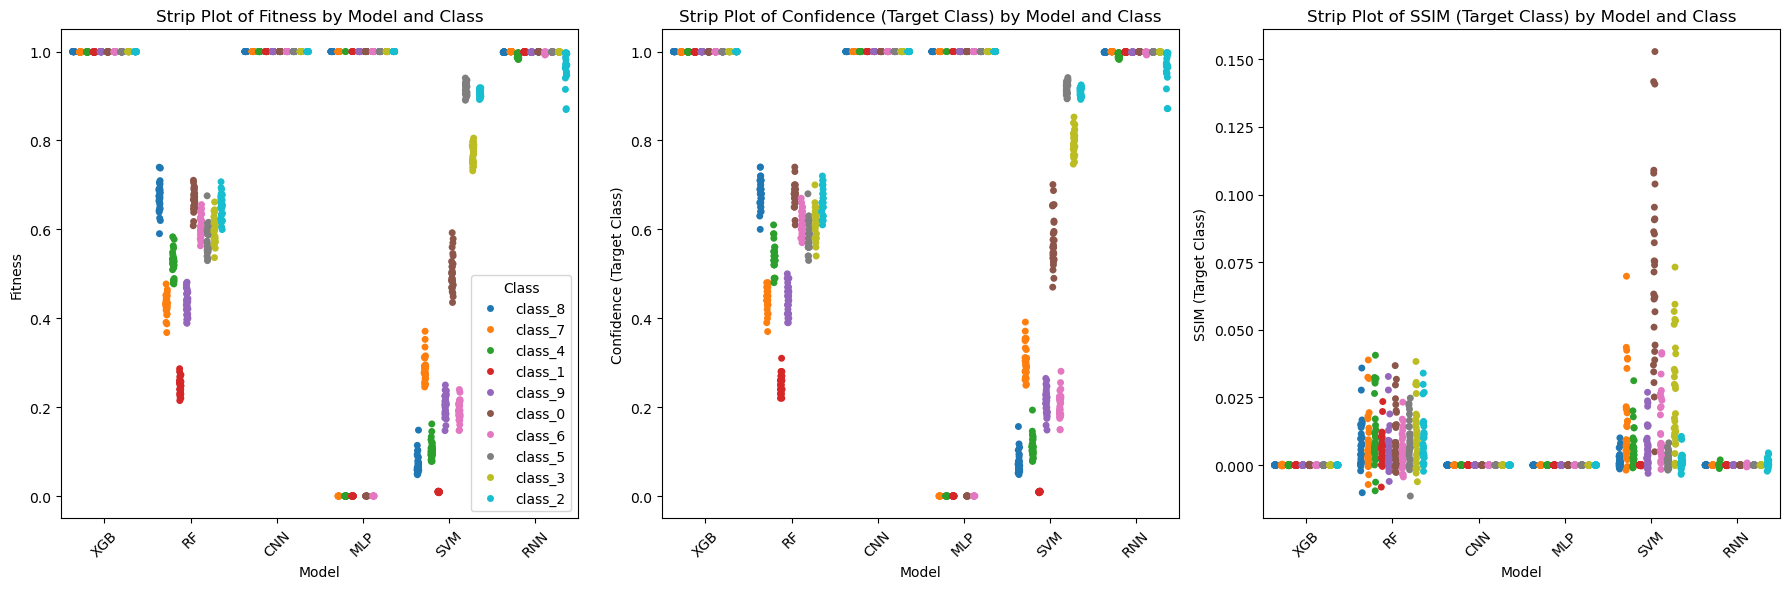

In [158]:
# Define the target metrics (replace with your actual metrics)
target_metrics = ['Fitness', 'Confidence (Target Class)', 'SSIM (Target Class)']
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Create strip plots for each metric
plt.figure(figsize=(18, 6))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 3, i)
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", palette=custom_palette, jitter=True, dodge=True)
    plt.title(f"Strip Plot of {metric} by Model and Class")
    plt.xticks(rotation=45)  # Rotate model names for better readability
    if i == 1:
        plt.legend(title='Class')
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

plt.tight_layout()
plt.show()

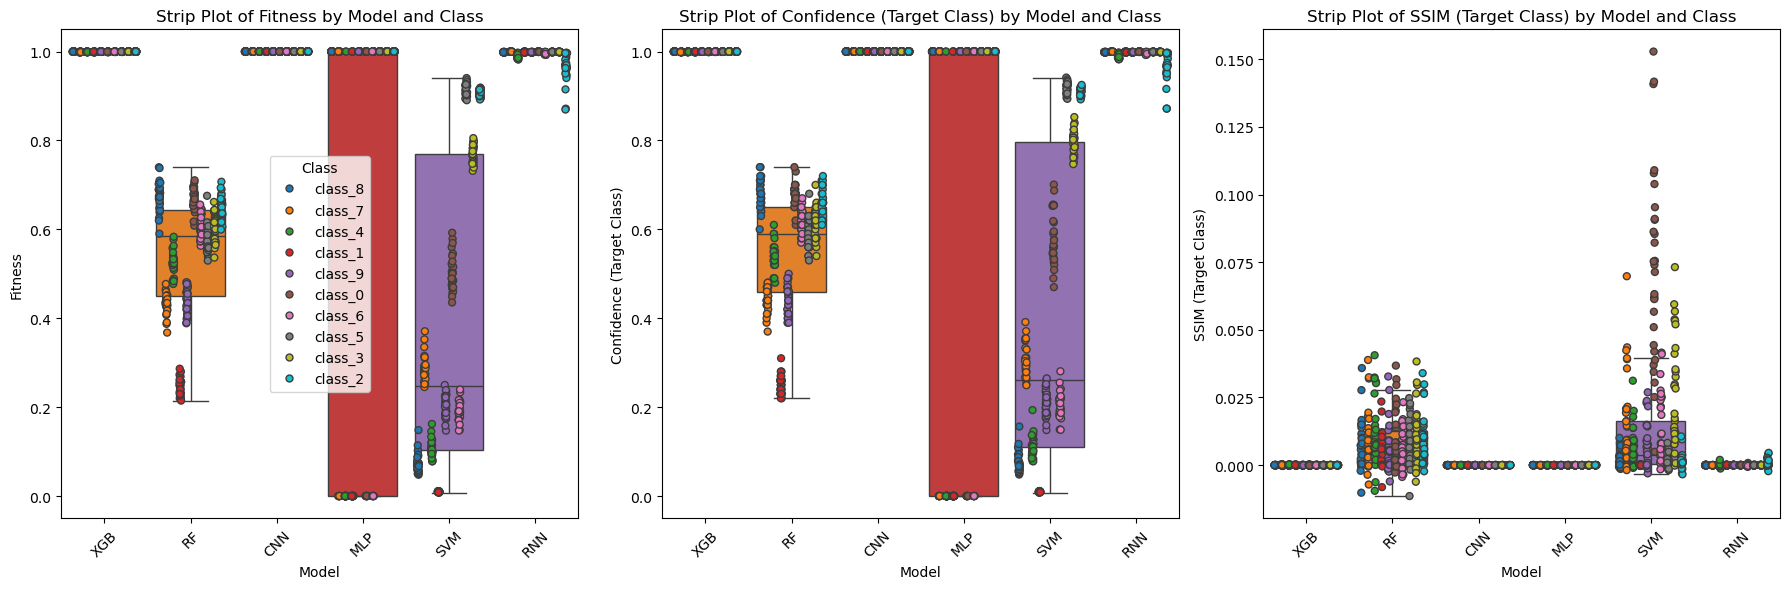

In [137]:
# Create strip plots for each metric with superimposed box plots
plt.figure(figsize=(18, 6))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Model", y=metric, data=data, hue="Model", palette=custom_palette[:len(data["Model"].unique())], showfliers=False, legend=False)  # Add box plot
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", palette=custom_palette, jitter=True, dodge=True, linewidth=1, edgecolor='auto')  # Add strip plot
    plt.title(f"Strip Plot of {metric} by Model and Class")
    plt.xticks(rotation=45)  # Rotate model names for better readability
    if i == 1:
        plt.legend(title='Class')
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

plt.tight_layout()
plt.show()


## mnistFashion

Average Generation: 91177.59416666666
Average Generation is not 100000. Details:
Number of instances: 249
      Generation Model    Class     Replicate
0        64240.0   CNN  class_8  replicate_15
1        33703.0   CNN  class_8   replicate_9
2        56462.0   CNN  class_8  replicate_14
5        71367.0   CNN  class_8  replicate_11
6        60787.0   CNN  class_8  replicate_19
...          ...   ...      ...           ...
1108     99617.0   XGB  class_0  replicate_20
1111     17235.0   XGB  class_0  replicate_10
1145     82102.0   XGB  class_5  replicate_11
1154     80777.0   XGB  class_5  replicate_12
1155     88002.0   XGB  class_5  replicate_13

[249 rows x 4 columns]


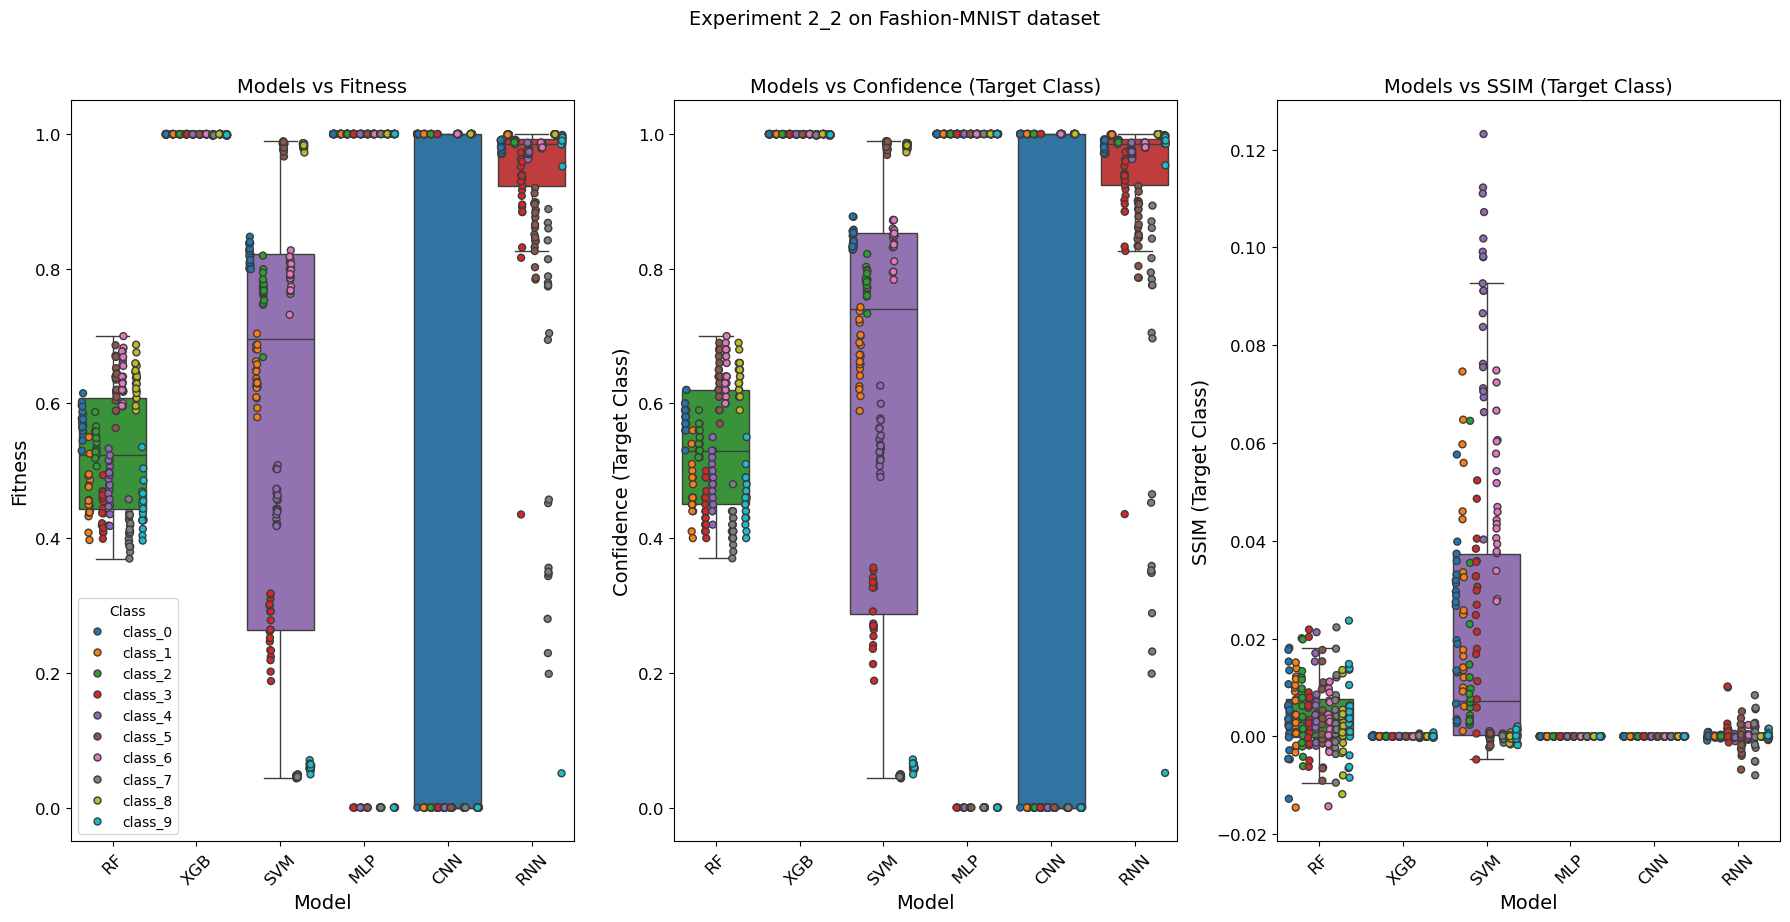

In [284]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_2_2_mnistFashion_aggregated.csv")
experiment = "2_2"
dataset = "Fashion-MNIST"

# Filter relevant columns (target class metrics)
target_metrics = ["Fitness", "Confidence (Target Class)", "SSIM (Target Class)"]
num_metrics = len(target_metrics)

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

data = data[["Model", "Class", "Generation" , "Replicate"] + target_metrics]
print("Average Generation:", data["Generation"].mean())
# Check if the average generation is not 100000 and print the relevant info
if not np.isclose(data["Generation"].mean(), 100000):
    print("Average Generation is not 100000. Details:")
    print(f"Number of instances: {len(data[~np.isclose(data['Generation'], 100000)])}")
    print(data[["Generation", "Model", "Class", "Replicate"]][~np.isclose(data["Generation"], 100000)])


# Ensure classes are ordered from 0 to 9
data['Class'] = pd.Categorical(data['Class'], categories=[f'class_{i}' for i in range(10)], ordered=True)

# Define the order for the models on the x-axis
model_order = ["RF", "XGB", "SVM", "MLP", "CNN", "RNN"]

# Create strip plots for each metric with superimposed box plots
plt.figure(figsize=(6 * num_metrics, 3 * num_metrics))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Model", y=metric, data=data, hue="Model", 
                palette=custom_palette[:len(data["Model"].unique())], 
                showfliers=False, order=model_order, dodge=False)  # Add box plot
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", 
                  palette=custom_palette, jitter=True, dodge=True, linewidth=1, 
                  edgecolor='auto', order=model_order)  # Add strip plot
    plt.title(f"Models vs {metric}", fontsize=14)  # Adjust title fontsize
    plt.xlabel("Model", fontsize=14)  # Increase x-axis title fontsize
    plt.ylabel(metric, fontsize=14)  # Increase y-axis title fontsize
    plt.xticks(rotation=45)  # Rotate model names for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if i == 1:
        plt.legend(title='Class')  # Ensure legend for the first subplot
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

# Set the suptitle with proper alignment and spacing
plt.suptitle(f"Experiment {experiment} on {dataset} dataset", 
             fontsize=14, y=1.02, ha='center')  # Higher fontsize and adjusted 'y' position
plt.tight_layout()  # Adjust layout to ensure the plots fit below the suptitle

plt.show()



# Experiment 2_1a

## sklearnDigits

Average Generation: 50000.0


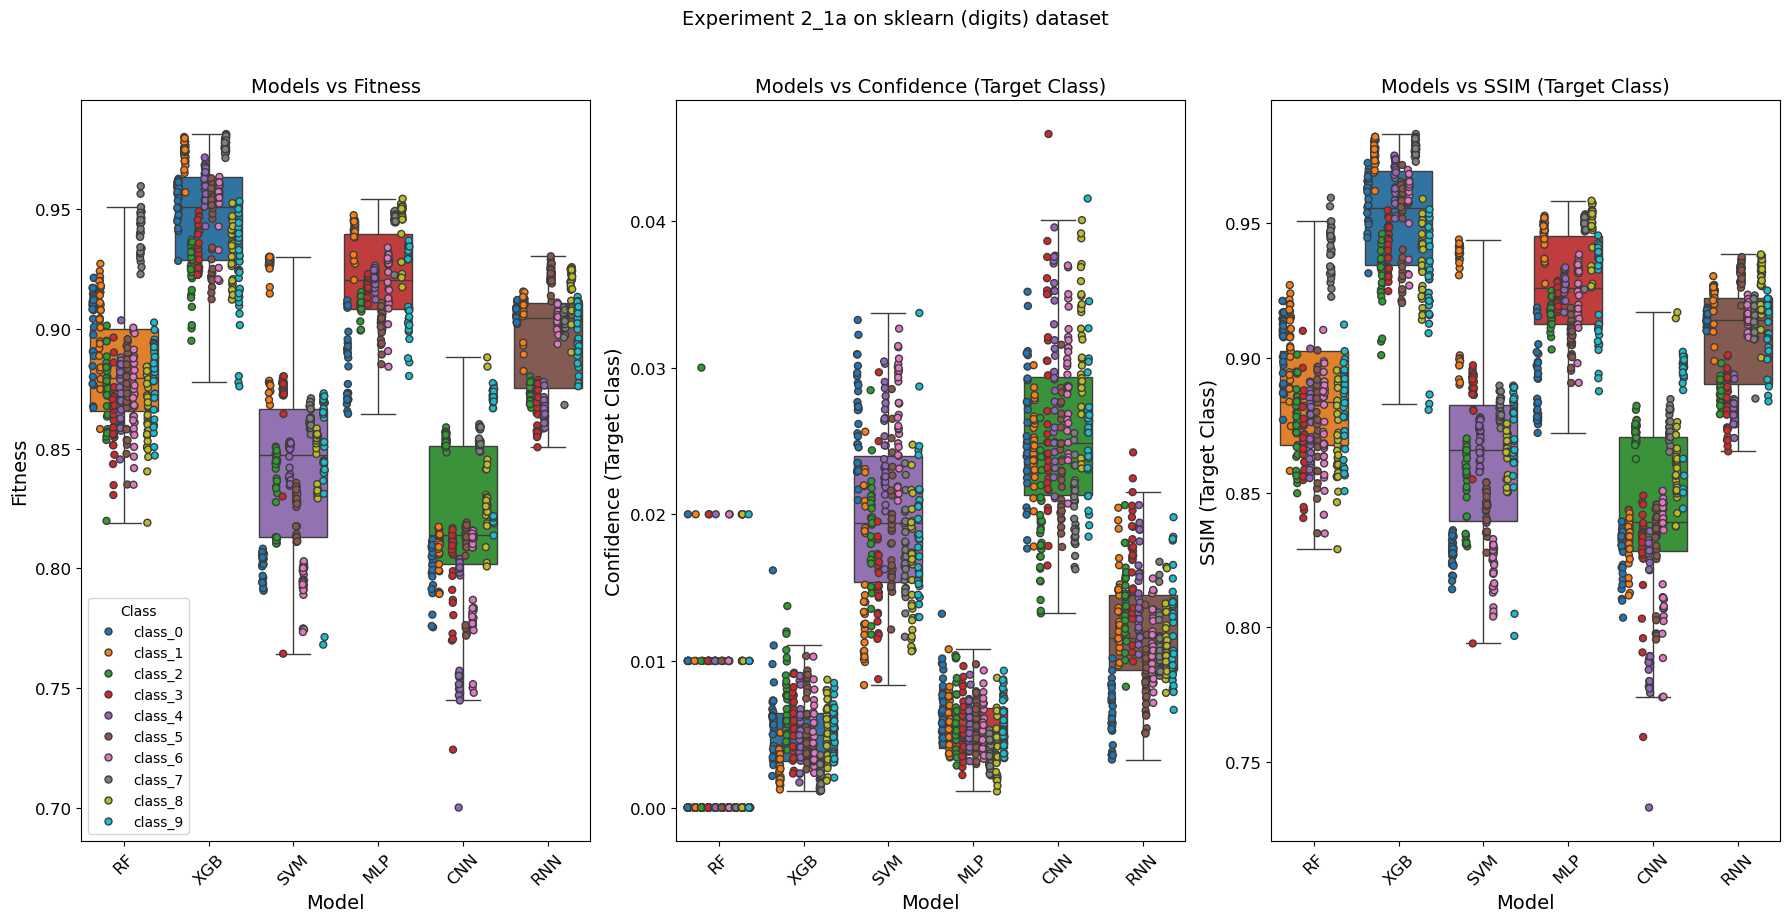

In [287]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_2_1a_sklearnDigits_aggregated.csv")
experiment = "2_1a"
dataset = "sklearn (digits)"

# Filter relevant columns (target class metrics)
target_metrics = ["Fitness", "Confidence (Target Class)", "SSIM (Target Class)"]
num_metrics = len(target_metrics)

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

data = data[["Model", "Class", "Generation" , "Replicate"] + target_metrics]
print("Average Generation:", data["Generation"].mean())
# Check if the average generation is not 50000 and print the relevant info
if not np.isclose(data["Generation"].mean(), 50000):
    print("Average Generation is not 50000. Details:")
    print(f"Number of instances: {len(data[~np.isclose(data['Generation'], 50000)])}")
    print(data[["Generation", "Model", "Class", "Replicate"]][~np.isclose(data["Generation"], 50000)])


# Ensure classes are ordered from 0 to 9
data['Class'] = pd.Categorical(data['Class'], categories=[f'class_{i}' for i in range(10)], ordered=True)

# Define the order for the models on the x-axis
model_order = ["RF", "XGB", "SVM", "MLP", "CNN", "RNN"]

# Create strip plots for each metric with superimposed box plots
plt.figure(figsize=(6 * num_metrics, 3 * num_metrics))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Model", y=metric, data=data, hue="Model", 
                palette=custom_palette[:len(data["Model"].unique())], 
                showfliers=False, order=model_order, dodge=False)  # Add box plot
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", 
                  palette=custom_palette, jitter=True, dodge=True, linewidth=1, 
                  edgecolor='auto', order=model_order)  # Add strip plot
    plt.title(f"Models vs {metric}", fontsize=14)  # Adjust title fontsize
    plt.xlabel("Model", fontsize=14)  # Increase x-axis title fontsize
    plt.ylabel(metric, fontsize=14)  # Increase y-axis title fontsize
    plt.xticks(rotation=45)  # Rotate model names for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if i == 1:
        plt.legend(title='Class')  # Ensure legend for the first subplot
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

# Set the suptitle with proper alignment and spacing
plt.suptitle(f"Experiment {experiment} on {dataset} dataset", 
             fontsize=14, y=1.02, ha='center')  # Higher fontsize and adjusted 'y' position
plt.tight_layout()  # Adjust layout to ensure the plots fit below the suptitle

plt.show()



## mnistDigits

Average Generation: 100000.0


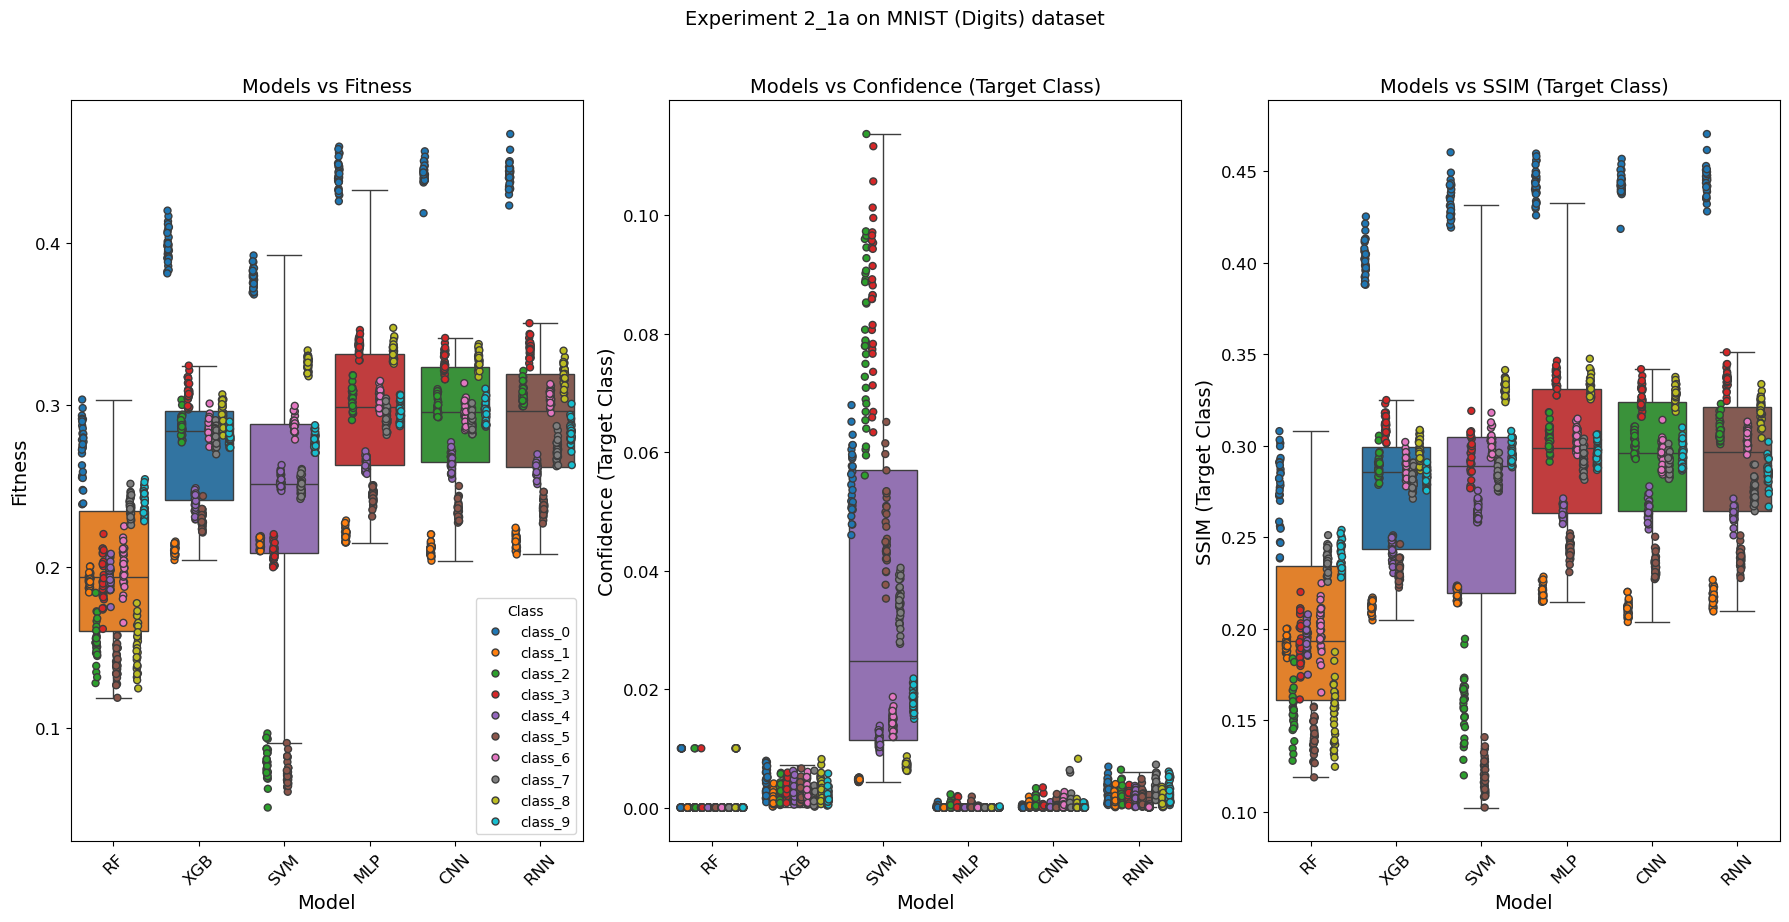

In [283]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_2_1a_mnistDigits_aggregated.csv")
experiment = "2_1a"
dataset = "MNIST (Digits)"

# Filter relevant columns (target class metrics)
target_metrics = ["Fitness", "Confidence (Target Class)", "SSIM (Target Class)"]
num_metrics = len(target_metrics)

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

data = data[["Model", "Class", "Generation" , "Replicate"] + target_metrics]
print("Average Generation:", data["Generation"].mean())
# Check if the average generation is not 100000 and print the relevant info
if not np.isclose(data["Generation"].mean(), 100000):
    print("Average Generation is not 100000. Details:")
    print(f"Number of instances: {len(data[~np.isclose(data['Generation'], 100000)])}")
    print(data[["Generation", "Model", "Class", "Replicate"]][~np.isclose(data["Generation"], 100000)])


# Ensure classes are ordered from 0 to 9
data['Class'] = pd.Categorical(data['Class'], categories=[f'class_{i}' for i in range(10)], ordered=True)

# Define the order for the models on the x-axis
model_order = ["RF", "XGB", "SVM", "MLP", "CNN", "RNN"]

# Create strip plots for each metric with superimposed box plots
plt.figure(figsize=(6 * num_metrics, 3 * num_metrics))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Model", y=metric, data=data, hue="Model", 
                palette=custom_palette[:len(data["Model"].unique())], 
                showfliers=False, order=model_order, dodge=False)  # Add box plot
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", 
                  palette=custom_palette, jitter=True, dodge=True, linewidth=1, 
                  edgecolor='auto', order=model_order)  # Add strip plot
    plt.title(f"Models vs {metric}", fontsize=14)  # Adjust title fontsize
    plt.xlabel("Model", fontsize=14)  # Increase x-axis title fontsize
    plt.ylabel(metric, fontsize=14)  # Increase y-axis title fontsize
    plt.xticks(rotation=45)  # Rotate model names for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if i == 1:
        plt.legend(title='Class')  # Ensure legend for the first subplot
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

# Set the suptitle with proper alignment and spacing
plt.suptitle(f"Experiment {experiment} on {dataset} dataset", 
             fontsize=14, y=1.02, ha='center')  # Higher fontsize and adjusted 'y' position
plt.tight_layout()  # Adjust layout to ensure the plots fit below the suptitle

plt.show()



# Experiment 2_1b

## sklearnDigits

Average Generation: 49727.8425
Average Generation is not 50000. Details:
Number of instances: 92
     Generation Model                              Class     Replicate
118       46900   XGB  target_class_9_non_target_class_0   replicate_1
300       46300    RF  target_class_3_non_target_class_9  replicate_27
301       47200    RF  target_class_3_non_target_class_9  replicate_29
302       47500    RF  target_class_3_non_target_class_9  replicate_22
303       46900    RF  target_class_3_non_target_class_9  replicate_21
..          ...   ...                                ...           ...
590       48500    RF  target_class_1_non_target_class_5   replicate_7
594       46300    RF  target_class_1_non_target_class_5  replicate_28
596       45884    RF  target_class_1_non_target_class_5  replicate_25
597       48500    RF  target_class_1_non_target_class_5   replicate_6
599       46600    RF  target_class_1_non_target_class_5  replicate_30

[92 rows x 4 columns]


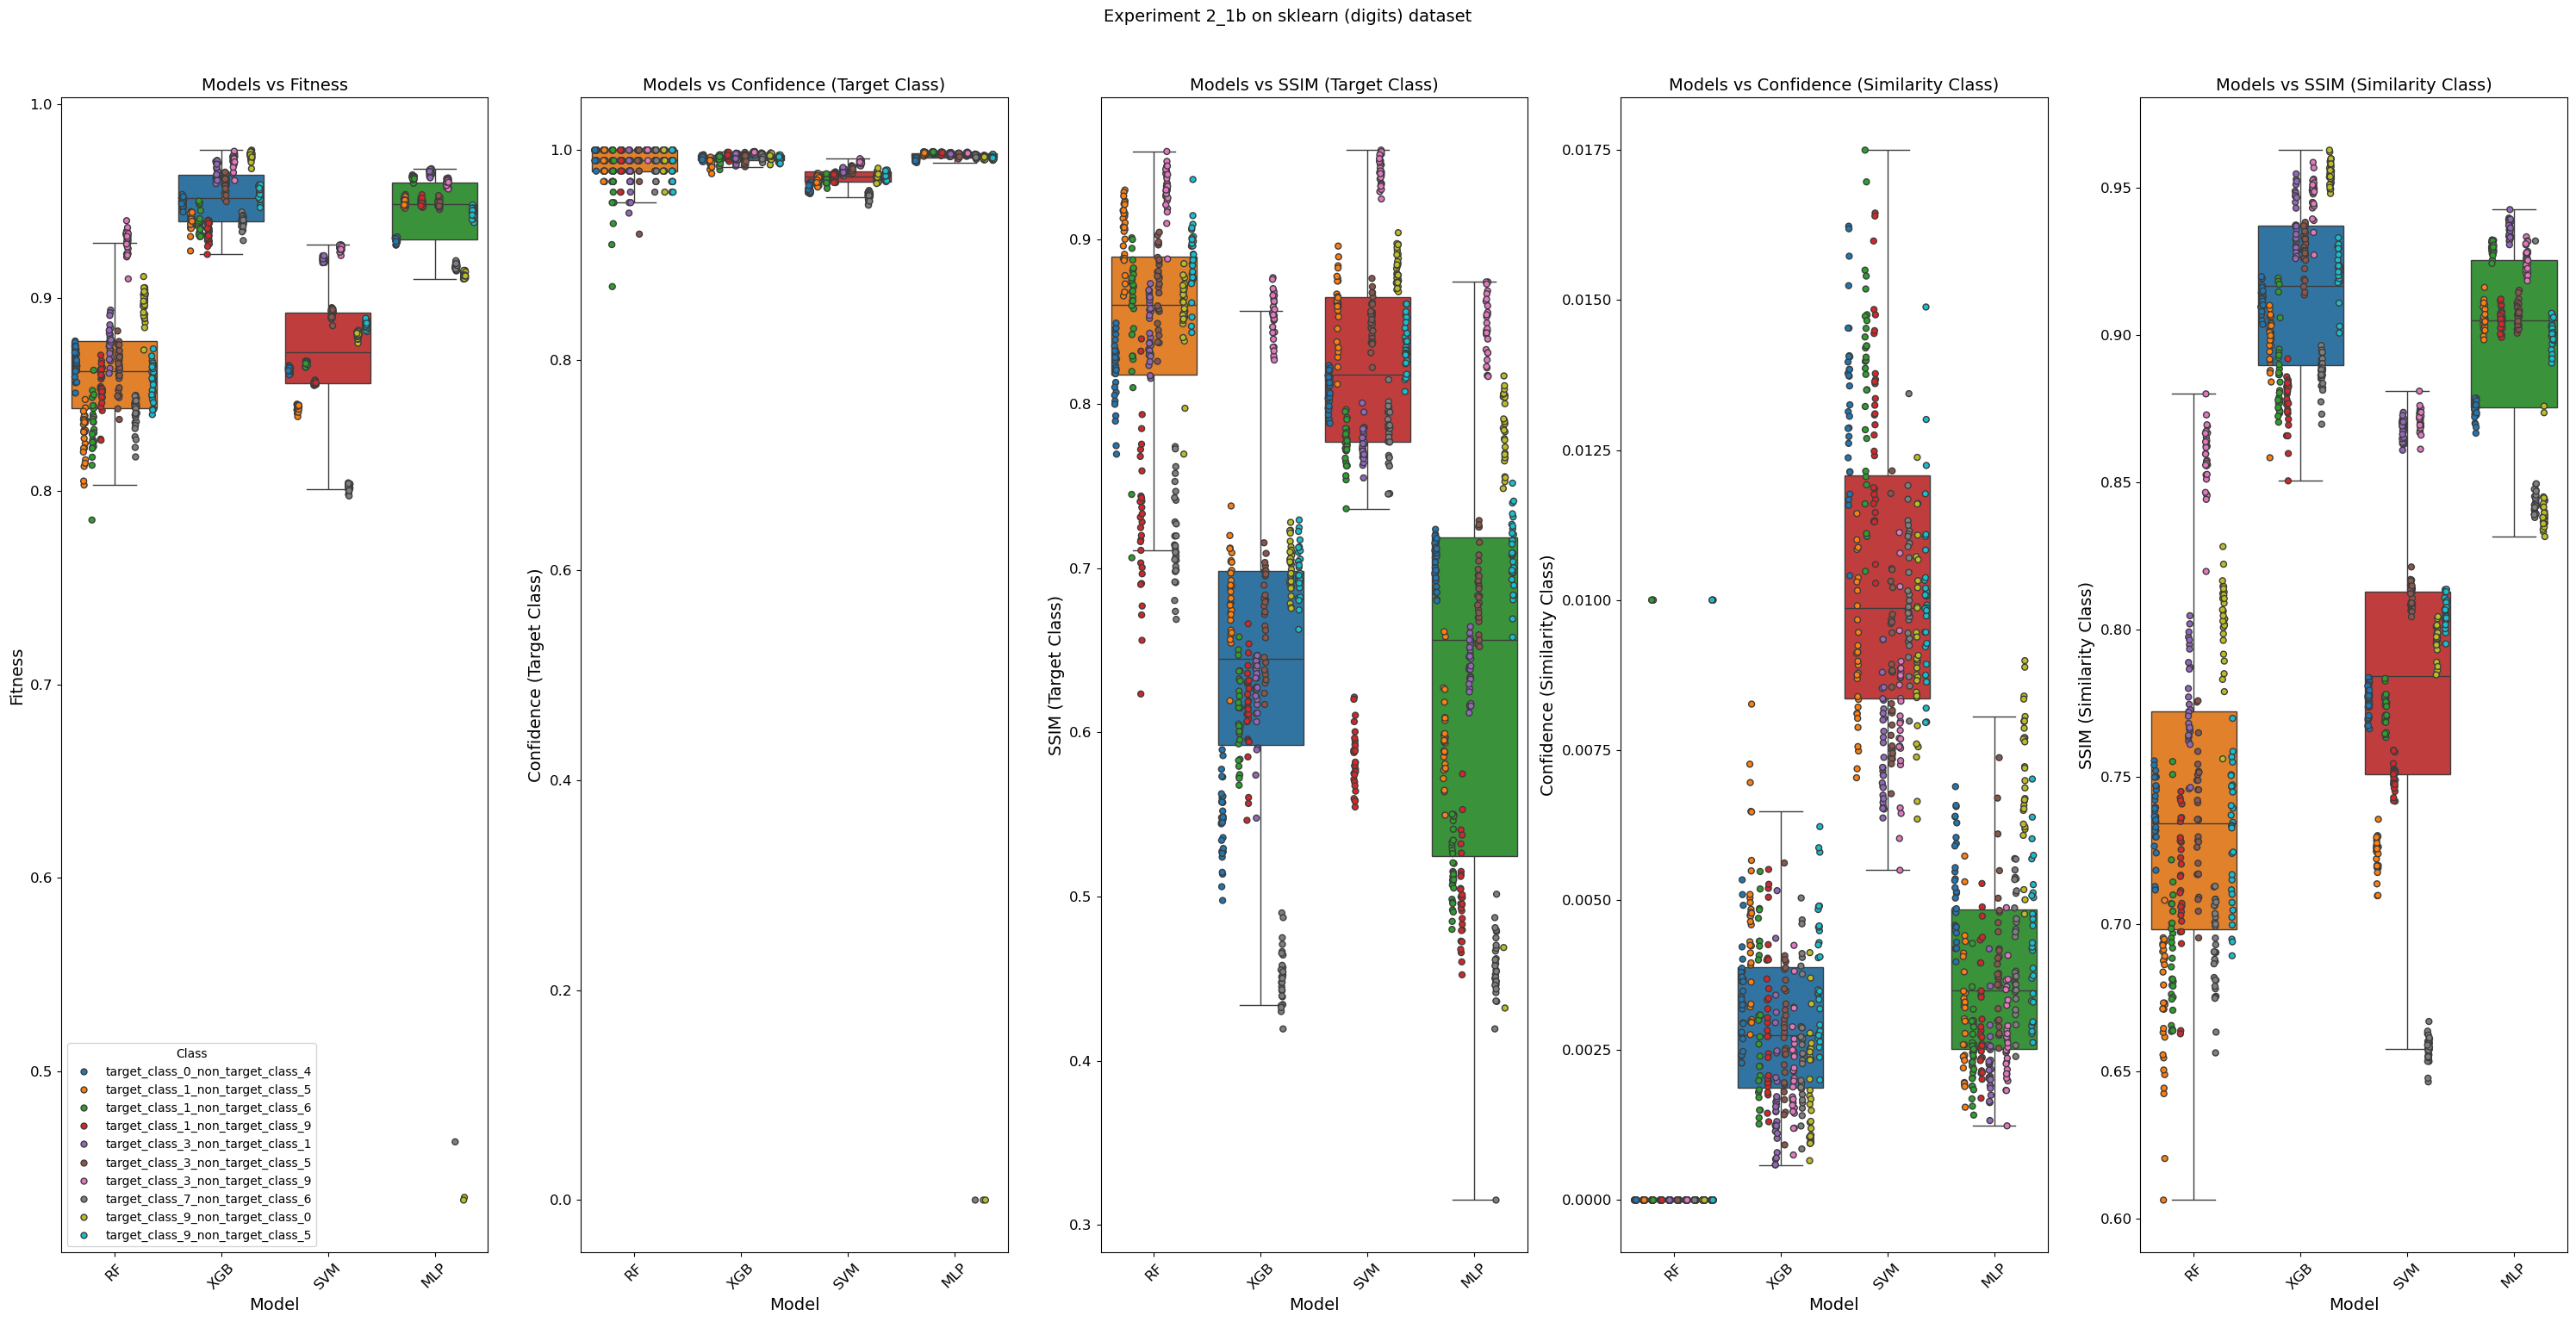

In [307]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_2_1b_sklearnDigits_aggregated.csv")
experiment = "2_1b"
dataset = "sklearn (digits)"

# Filter relevant columns (target class metrics)
target_metrics = ["Fitness", "Confidence (Target Class)", "SSIM (Target Class)", "Confidence (Similarity Class)", "SSIM (Similarity Class)"]

num_metrics = len(target_metrics)

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

data = data[["Model", "Class", "Generation" , "Replicate"] + target_metrics]

print("Average Generation:", data["Generation"].mean())

# Check if the average generation is not 50000 and print the relevant info
if not np.isclose(data["Generation"].mean(), 50000):
    print("Average Generation is not 50000. Details:")
    print(f"Number of instances: {len(data[~np.isclose(data['Generation'], 50000)])}")
    print(data[["Generation", "Model", "Class", "Replicate"]][~np.isclose(data["Generation"], 50000)])

# Ensure classes are ordered alphabetically
data['Class'] = pd.Categorical(data['Class'], categories=sorted(data['Class'].unique()), ordered=True)

# Define the order for the models on the x-axis
model_order = ["RF", "XGB", "SVM", "MLP"]

# Create strip plots for each metric with superimposed box plots
plt.figure(figsize=(6 * num_metrics, 3 * num_metrics))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, num_metrics, i)
    sns.boxplot(x="Model", y=metric, data=data, hue="Model", 
                palette=custom_palette[:len(data["Model"].unique())], 
                showfliers=False, order=model_order, dodge=False)  # Add box plot
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", 
                  palette=custom_palette, jitter=True, dodge=True, linewidth=1, 
                  edgecolor='auto', order=model_order)  # Add strip plot
    plt.title(f"Models vs {metric}", fontsize=14)  # Adjust title fontsize
    plt.xlabel("Model", fontsize=14)  # Increase x-axis title fontsize
    plt.ylabel(metric, fontsize=14)  # Increase y-axis title fontsize
    plt.xticks(rotation=45)  # Rotate model names for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if i == 1:
        plt.legend(title='Class')  # Ensure legend for the first subplot
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

# Set the suptitle with proper alignment and spacing
plt.suptitle(f"Experiment {experiment} on {dataset} dataset", 
             fontsize=14, y=1.02, ha='center')  # Higher fontsize and adjusted 'y' position
plt.tight_layout()  # Adjust layout to ensure the plots fit below the suptitle

plt.show()



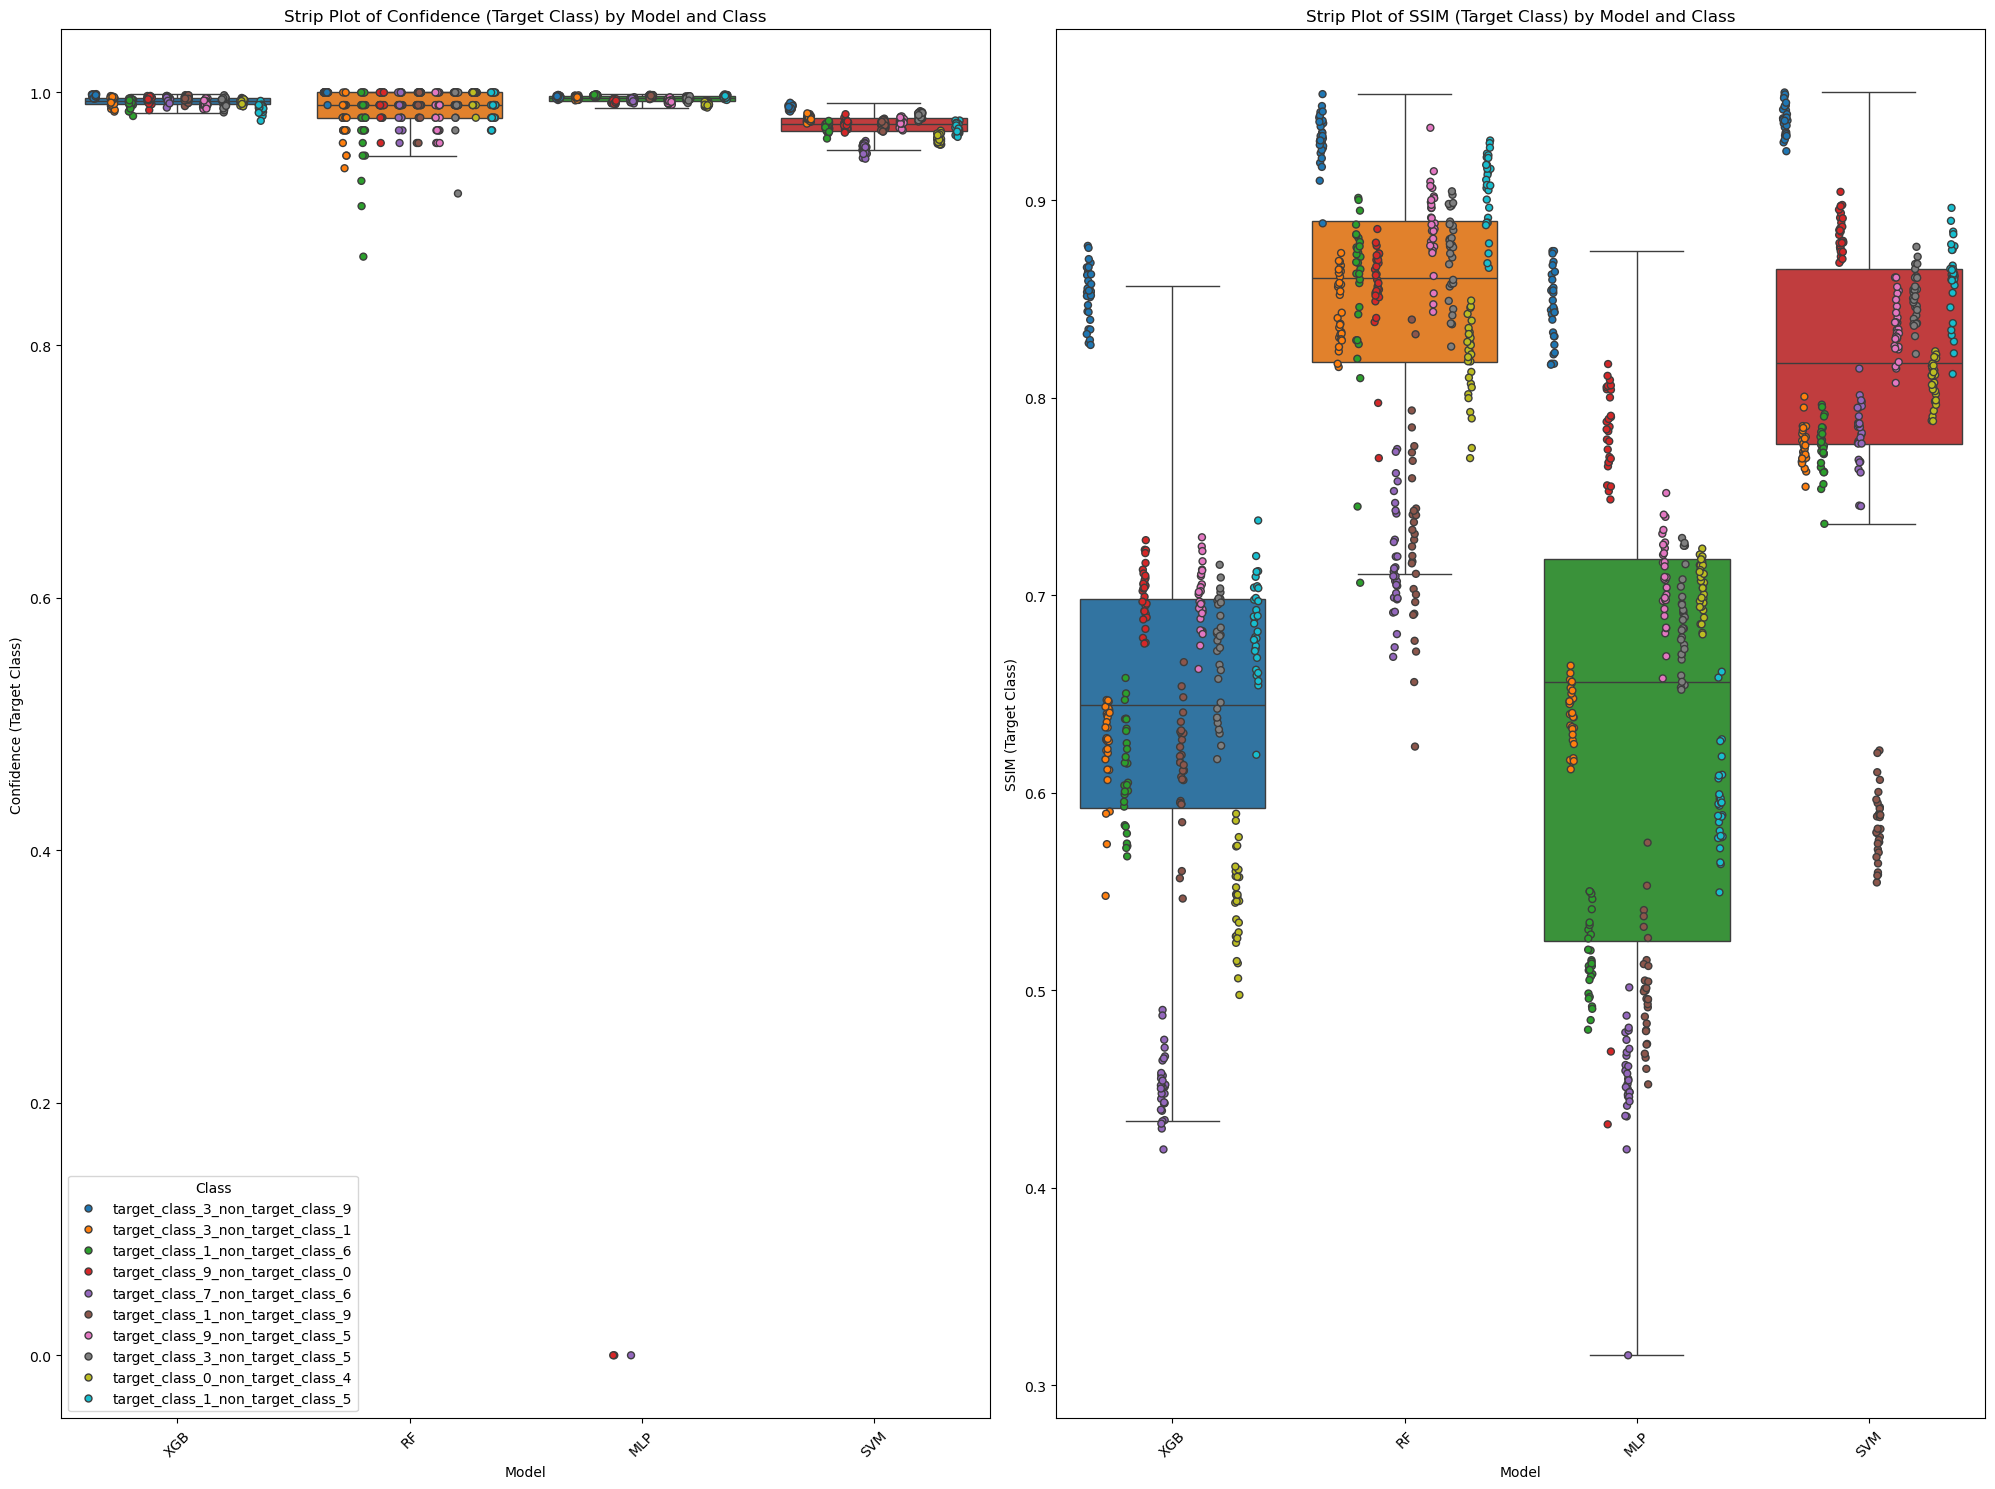

Average Generation: 49727.8425
Average Generation is not 50000. Details:
Number of instances: 92
     Generation Model                              Class     Replicate
118       46900   XGB  target_class_9_non_target_class_0   replicate_1
300       46300    RF  target_class_3_non_target_class_9  replicate_27
301       47200    RF  target_class_3_non_target_class_9  replicate_29
302       47500    RF  target_class_3_non_target_class_9  replicate_22
303       46900    RF  target_class_3_non_target_class_9  replicate_21
..          ...   ...                                ...           ...
590       48500    RF  target_class_1_non_target_class_5   replicate_7
594       46300    RF  target_class_1_non_target_class_5  replicate_28
596       45884    RF  target_class_1_non_target_class_5  replicate_25
597       48500    RF  target_class_1_non_target_class_5   replicate_6
599       46600    RF  target_class_1_non_target_class_5  replicate_30

[92 rows x 4 columns]


/tmp/ipykernel_40183/2736080122.py:76: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.stripplot(x="Model", y=metric, data=data, hue="Class",
/tmp/ipykernel_40183/2736080122.py:86: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Class')  # Ensure legend for the first subplot
/tmp/ipykernel_40183/2736080122.py:76: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.stripplot(x="Model", y=metric, data=data, hue="Class",
/tmp/ipykernel_40183/2736080122.py:88: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy
/tmp/ipykernel_40183/2736080122.py:76: UserWarning: Ignoring `palet

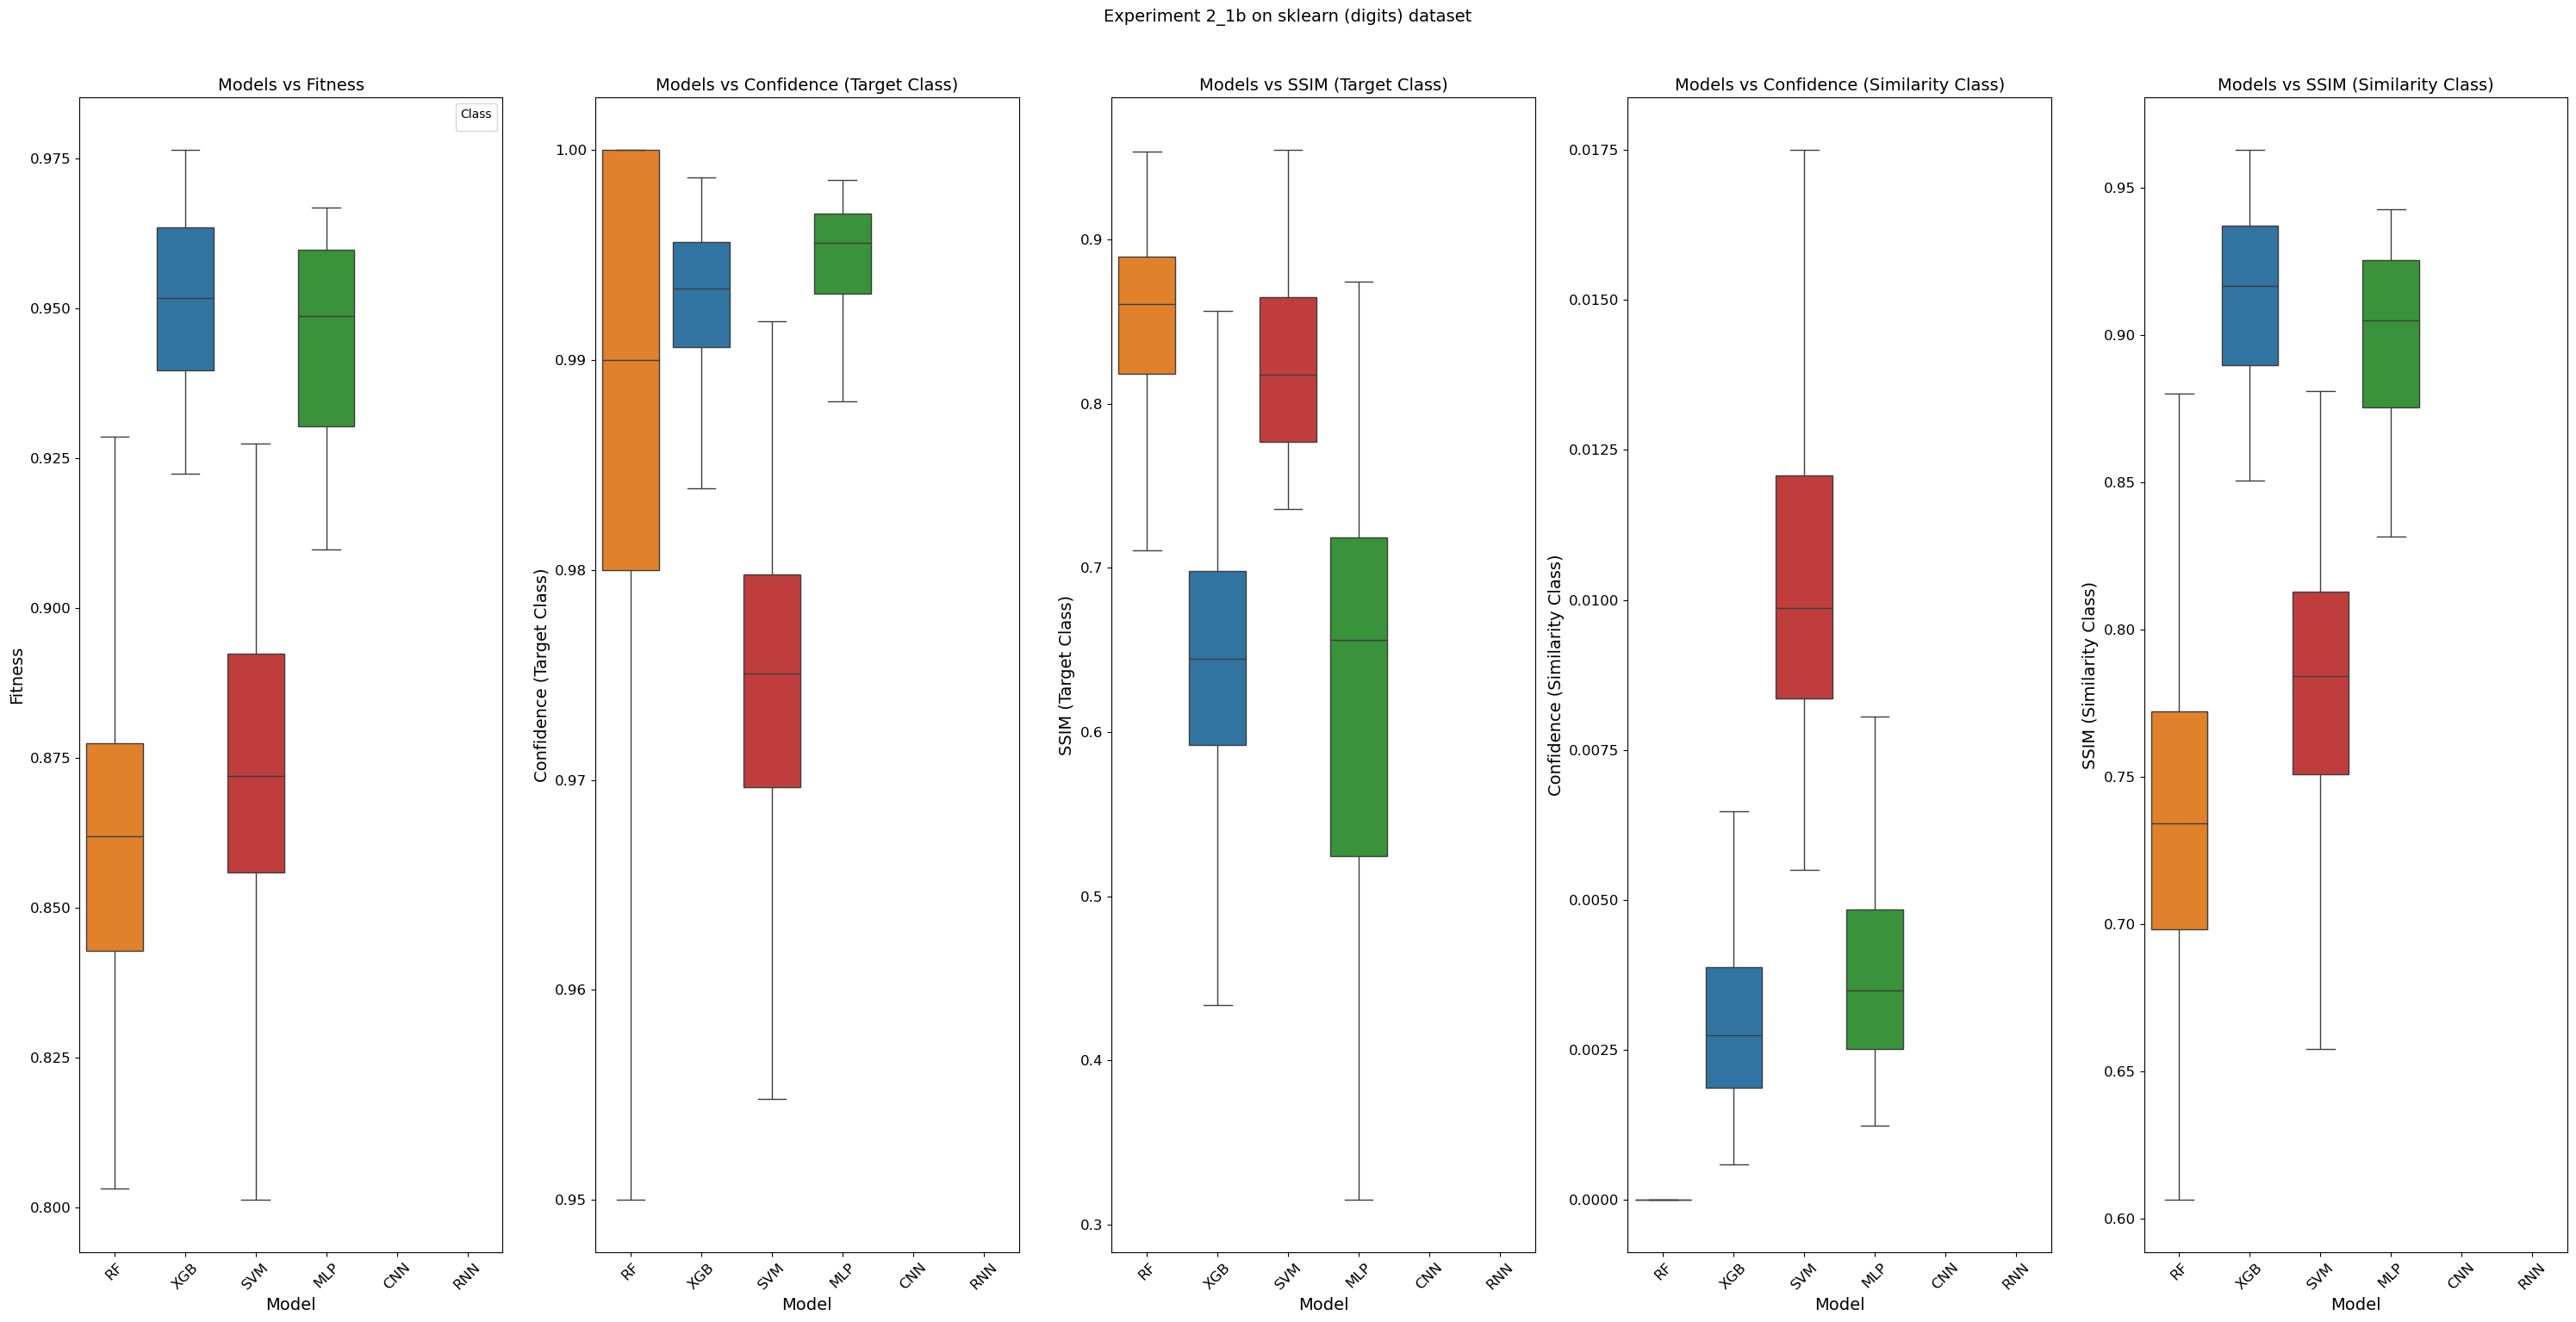

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_2_1b_sklearnDigits_aggregated.csv")

# Filter relevant columns (target class metrics)
target_metrics = ["Confidence (Target Class)", "SSIM (Target Class)"]

data = data[["Model", "Class", "Generation"] + target_metrics]

# Create strip plots for each metric with superimposed box plots
plt.figure(figsize=(18, 6))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Model", y=metric, data=data, hue="Model", palette=custom_palette[:len(data["Model"].unique())], showfliers=False, legend=False)  # Add box plot
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", palette=custom_palette, jitter=True, dodge=True, linewidth=1, edgecolor='auto')  # Add strip plot
    plt.title(f"Strip Plot of {metric} by Model and Class")
    plt.xticks(rotation=45)  # Rotate model names for better readability
    if i == 1:
        plt.legend(title='Class')
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

plt.tight_layout()
plt.show()






import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_2_1b_sklearnDigits_aggregated.csv")
experiment = "2_1b"
dataset = "sklearn (digits)"

# Filter relevant columns (target class metrics)
target_metrics = ["Fitness", "Confidence (Target Class)", "SSIM (Target Class)", "Confidence (Similarity Class)", "SSIM (Similarity Class)"]

num_metrics = len(target_metrics)

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

data = data[["Model", "Class", "Generation" , "Replicate"] + target_metrics]


print("Average Generation:", data["Generation"].mean())

# Check if the average generation is not 50000 and print the relevant info
if not np.isclose(data["Generation"].mean(), 50000):
    print("Average Generation is not 50000. Details:")
    print(f"Number of instances: {len(data[~np.isclose(data['Generation'], 50000)])}")
    print(data[["Generation", "Model", "Class", "Replicate"]][~np.isclose(data["Generation"], 50000)])


# Ensure classes are ordered from 0 to 9
data['Class'] = pd.Categorical(data['Class'], categories=[f'class_{i}' for i in range(10)], ordered=True)

# Define the order for the models on the x-axis
model_order = ["RF", "XGB", "SVM", "MLP", "CNN", "RNN"]

# Create strip plots for each metric with superimposed box plots
plt.figure(figsize=(6 * num_metrics, 3 * num_metrics))  # Adjust figure size for better visualization
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, num_metrics, i)
    sns.boxplot(x="Model", y=metric, data=data, hue="Model", 
                palette=custom_palette[:len(data["Model"].unique())], 
                showfliers=False, order=model_order, dodge=False)  # Add box plot
    sns.stripplot(x="Model", y=metric, data=data, hue="Class", 
                  palette=custom_palette, jitter=True, dodge=True, linewidth=1, 
                  edgecolor='auto', order=model_order)  # Add strip plot
    plt.title(f"Models vs {metric}", fontsize=14)  # Adjust title fontsize
    plt.xlabel("Model", fontsize=14)  # Increase x-axis title fontsize
    plt.ylabel(metric, fontsize=14)  # Increase y-axis title fontsize
    plt.xticks(rotation=45)  # Rotate model names for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if i == 1:
        plt.legend(title='Class')  # Ensure legend for the first subplot
    else:
        plt.legend().remove()  # Remove legend for subplots after the first one to avoid redundancy

# Set the suptitle with proper alignment and spacing
plt.suptitle(f"Experiment {experiment} on {dataset} dataset", 
             fontsize=14, y=1.02, ha='center')  # Higher fontsize and adjusted 'y' position
plt.tight_layout()  # Adjust layout to ensure the plots fit below the suptitle

plt.show()




In [48]:
# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_2_1b_sklearnDigits_aggregated.csv")

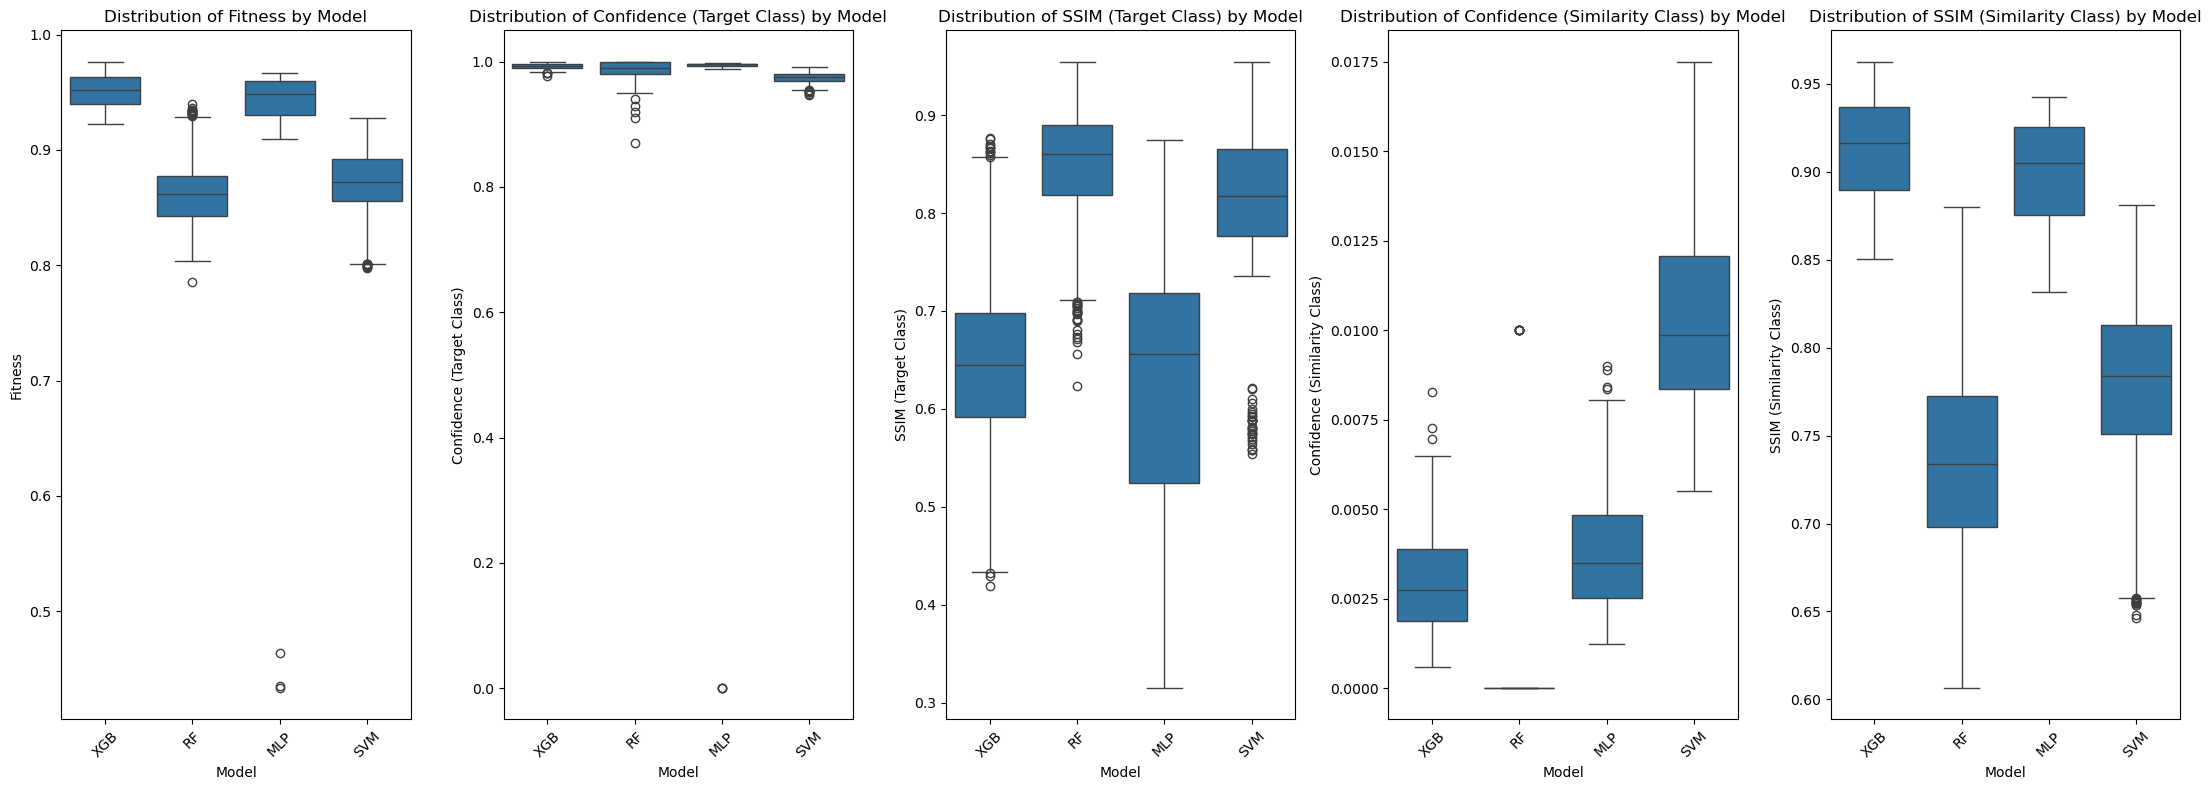

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter relevant columns (target class metrics)
target_metrics = ["Fitness", "Confidence (Target Class)", "SSIM (Target Class)", "Confidence (Similarity Class)", "SSIM (Similarity Class)"]
data = data[["Model"] + target_metrics]

# Create box plots for each metric
plt.figure(figsize=(22, 8))
for i, metric in enumerate(target_metrics, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(x="Model", y=metric, data=data)
    plt.title(f"Distribution of {metric} by Model")
    plt.xticks(rotation=45)  # Rotate model names for better readability
plt.tight_layout()
plt.show()

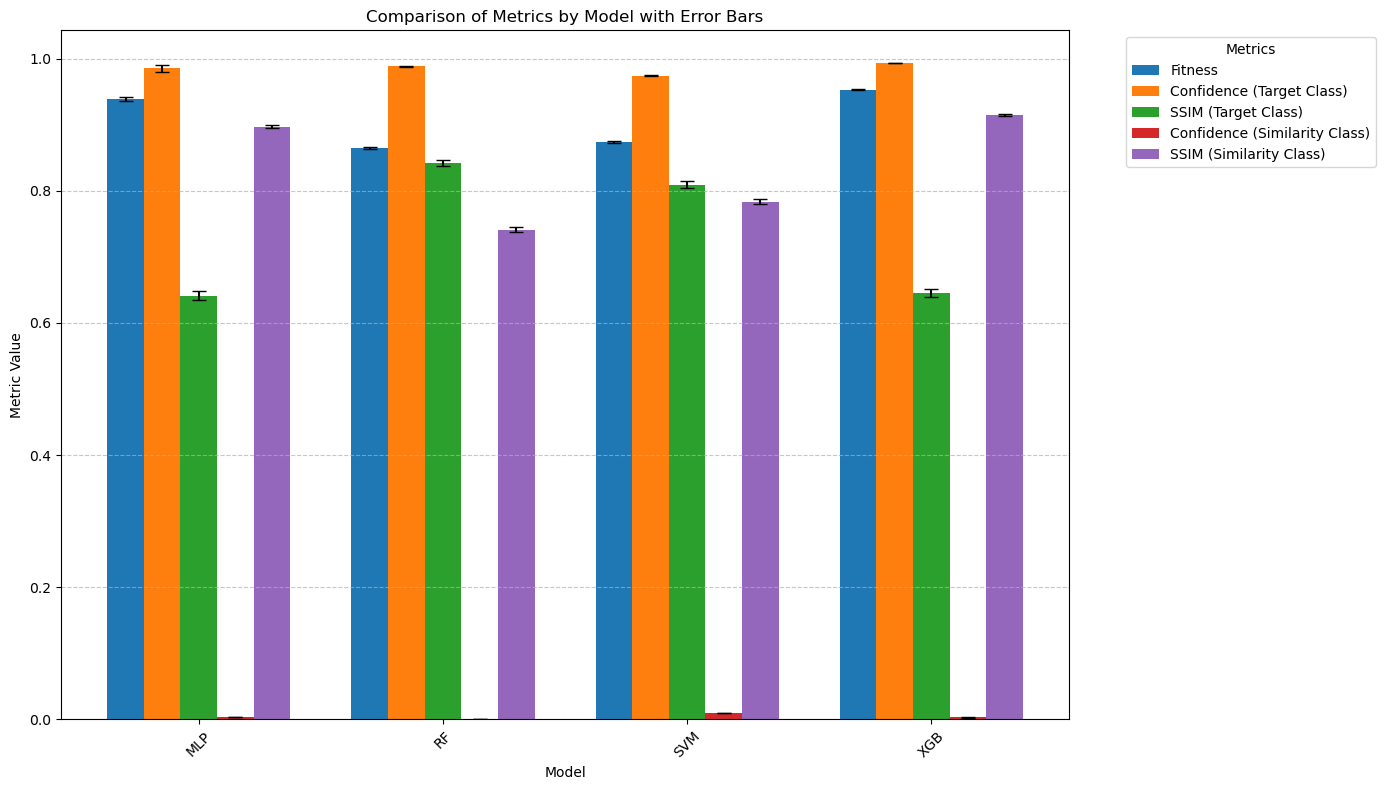

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("/media/ankit-gupta/546B-6466/aggregated_data/final_gen_data/Exp_2_1b_sklearnDigits_aggregated.csv")

# Filter relevant columns (target class metrics)
target_metrics = ["Fitness", "Confidence (Target Class)", "SSIM (Target Class)", "Confidence (Similarity Class)", "SSIM (Similarity Class)"]
data = data[["Model"] + target_metrics]


# Calculate mean and standard error of the mean (sem) for each metric by model
summary_stats = data.groupby("Model")[target_metrics].agg(["mean", "sem"]).reset_index()

# Set up the plot
plt.figure(figsize=(14, 8))
bar_width = 0.15  # Width of each bar
x = np.arange(len(summary_stats["Model"]))  # X-axis positions for models

# Plot bars for each metric
for i, metric in enumerate(target_metrics):
    plt.bar(
        x + i * bar_width,  # Offset bars for each metric
        summary_stats[(metric, "mean")],  # Mean values
        width=bar_width,
        yerr=summary_stats[(metric, "sem")],  # Error bars (standard error of the mean)
        capsize=5,  # Add caps to error bars
        label=metric  # Label for the legend
    )

# Customize the plot
plt.xlabel("Model")
plt.ylabel("Metric Value")
plt.title("Comparison of Metrics by Model with Error Bars")
plt.xticks(x + bar_width * (len(target_metrics) - 1) / 2, summary_stats["Model"], rotation=45)  # X-axis labels
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc="upper left")  # Add legend
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()